# Elasticnet batch 


‰ªÄÈ∫ºÊôÇÂÄôÁî®ÂÆÉÔºü
Áï∂Ê∫´Â∫¶ÊÑüÊ∏¨ÈªûÈ´òÂ∫¶ÂÖ±Á∑öÔºàÂæàÂ∏∏Ë¶ãÔºâ‰∏î‰Ω†Â∏åÊúõËá™ÂãïÈÅ∏Êìá/Â£ìÁ∏ÆÁâπÂæµ„ÄÅÈôç‰ΩéÈÅéÂ∫¶Êì¨Âêà„ÄÇElasticNet ‰ªãÊñº Lasso Ëàá Ridge ‰πãÈñìÔºåÂæàÈÅ©ÂêàÈÄôÈ°ûÂ§öÊ∫´Â∫¶ÊÑüÊ∏¨Âô®ÁöÑË≥áÊñô„ÄÇ

ÂÅöÊ≥ïÊ¶ÇËßÄ

ËÆÄÂèñÂ§öÂÄãË®ìÁ∑¥ CSV ‰∏¶Âêà‰ΩµÔºõ2) Âè™Áî®Êï∏ÂÄºÊ¨ÑÔºàÂéªÊéâÁõÆÊ®ôÔºâÂÅöÁâπÂæµÔºõ3) Ê®ôÊ∫ñÂåñÔºõ4) Áî® ElasticNetCVÔºà‰∫§ÂèâÈ©óË≠âË™ø Œ± Ëàá l1_ratioÔºâÔºõ5) ‰ª•„ÄåÊØèÊ™îÊ°àÁ¨¨ 101 Á≠ÜËµ∑„ÄçË®àÁÆóÁ´∂Ë≥ΩÁâà RMSE„ÄÇ

Ê≥®ÊÑèÔºö‰∏ãÊñπË©ï‰º∞ÊòØ„ÄåÂñÆ‰∏ÄÂÖ®ÂüüÊ®°Âûã„ÄçÂú®ÊØèÂÄãÊ™îÊ°à‰∏äÁ¨¨ 101 Á≠Ü‰πãÂæåÂÅöÈ†êÊ∏¨Ôºõ‰∏çÊúÉÂÅ∑Áî®Á¨¨ 100 Á≠Ü‰πãÂæåÁöÑÊ≠£Ëß£ÔºàÈÅøÂÖçÊ¥©ÊºèÔºâ„ÄÇ

ÂèØÂÜçÂä†Âº∑ÁöÑÁâπÂæµÔºàÂÖàÊää baseline Ë∑ëËµ∑‰æÜÂÜçÁñäÔºâÔºö

ÊôÇÈñìË°çÁîüÔºöTime ÁöÑÂ§öÈ†ÖÂºè/ÂàÜÊÆµÔºàÂõ†‰∏âÈöéÊÆµËΩâÈÄüÈÄ≤Áµ¶ÔºâÔºåÊàñÂä†„ÄåÈöéÊÆµ one-hot„Äç„ÄÇ

Ê∫´Â∫¶ÂãïÊÖãÔºöÁßªÂãïÂπ≥Âùá/ÁßªÂãïÂ∑ÆÂàÜÔºà‰æãÂ¶ÇÂêÑÊ∫´Â∫¶ 5/15 ÂàÜÈêòÂùáÂÄºËàáÊñúÁéáÔºâ„ÄÇ

Áõ∏Â∞çÊ∫´Â∫¶ÔºöÂêÑÈªûÁõ∏Â∞çÊñºÁí∞Â¢ÉÂü∫Ê∫ñÔºàÂ¶Ç PT01 ÊàñÂÖ®È´îÂπ≥ÂùáÔºâÁöÑÂ∑Æ„ÄÇ

‰ª•‰∏äÈÉΩËÉΩÁî® pd.DataFrame.rolling() / .diff() ÂÅöÂá∫‰æÜÔºåÂè™Ë¶ÅÈÅøÂÖçÁî®Âà∞Êú™‰æÜË≥áË®äÂç≥ÂèØÔºà‰ΩøÁî®Áï∂‰∏ãËàáÈÅéÂéªÔºâ„ÄÇ

In [11]:
# ==== ElasticNet Áâà ====
import numpy as np
import pandas as pd
from pathlib import Path
from glob import glob

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNetCV
from sklearn.multioutput import MultiOutputRegressor

# ---- ÂØ¶ÈöõË≥áÊñôÂ§æË∑ØÂæë (Â∑≤‰ª£ÂÖ•ÁµïÂ∞çË∑ØÂæë) ----
BASE_DIR = "/Users/benjamin/1132/11325/AI_Race/2025_dataset_0806 3"
TRAIN_DIR = f"{BASE_DIR}/train"          # 43 ÂÄãË®ìÁ∑¥Ê™îÊâÄÂú®
TEST_DIR  = f"{BASE_DIR}/train"          # Êö´ÊôÇÂÖàÊåáÂêëÂêåË≥áÊñôÂ§æÂÅöÊµÅÁ®ãÈ©óË≠âÔºõËã•ÊúâÊ≠£Âºè test Ë≥áÊñôÂ§æÂÜçÊîπ
OUT_DIR_ELASTIC = "/Users/benjamin/1132/11325/AI_Race/preds_out_elasticnet"  # ElasticNet È†êÊ∏¨Ëº∏Âá∫

TARGETS = ["Disp. X", "Disp. Z"]

# ========== ËºîÂä©ÔºöÊ™¢Êü•Ë≥áÊñôÂ§æ ==========
def _assert_folder_has_csv(folder, role):
    files = sorted(glob(str(Path(folder) / "*.csv")))
    if len(files) == 0:
        raise ValueError(f"{role} Ë≥áÊñôÂ§æ '{folder}' ‰∏ãÊâæ‰∏çÂà∞‰ªª‰Ωï CSVÔºåË´ãÁ¢∫Ë™çË∑ØÂæëÊòØÂê¶Ê≠£Á¢∫ (ÁµïÂ∞çË∑ØÂæë & ÁÑ°ÊâìÈåØ)„ÄÇ")
    return files

# ========== ËºâÂÖ• ==========
def load_many_csvs(folder):
    files = _assert_folder_has_csv(folder, "Ë®ìÁ∑¥")
    dfs = []
    for f in files:
        df = pd.read_csv(f, low_memory=False)
        df["__file__"] = Path(f).name  # Ë©ï‰º∞ËàáËº∏Âá∫Áî®
        dfs.append(df)
    return pd.concat(dfs, ignore_index=True), files

# ========== ÁµÑÁâπÂæµ/ÁõÆÊ®ô ==========
def build_Xy(df):
    # ÂèñÂá∫ÈùûÁõÆÊ®ôÊ¨Ñ‰∏îÈùûËºîÂä©Ê¨Ñ‰Ωç
    raw_feat_cols = [c for c in df.columns if c not in TARGETS + ["__file__"]]
    # ÂÉÖ‰øùÁïôÂèØËΩâÊàêÊï∏ÂÄºÁöÑÊ¨Ñ‰ΩçÔºåÈÅøÂÖç "could not convert string to float" È°ûÈåØË™§
    numeric_cols = []
    for c in raw_feat_cols:
        ser_num = pd.to_numeric(df[c], errors="coerce")
        valid_ratio = ser_num.notna().mean()
        if valid_ratio > 0.95:  # ÈñÄÊ™ªÂèØË™ø
            numeric_cols.append(c)
    if len(numeric_cols) == 0:
        raise ValueError("Ê≤íÊúâÂèØÁî®ÁöÑÊï∏ÂÄºÁâπÂæµÊ¨Ñ‰ΩçÔºõË´ãÊ™¢Êü•Ë≥áÊñôÊòØÂê¶ËºâÂÖ•Ê≠£Á¢∫ÊàñË™øÊï¥ÁâπÂæµÊåëÈÅ∏ÈÇèËºØ„ÄÇ")
    X = df[numeric_cols].to_numpy(dtype=float)
    y = None
    if all(t in df.columns for t in TARGETS):
        y = df[TARGETS].to_numpy(dtype=float)
    return X, y, numeric_cols

# ========== Âª∫Ê®° ==========
def fit_elasticnet(X, y, random_state=42):
    if y is None:
        raise ValueError("Ë®ìÁ∑¥Ë≥áÊñôÁº∫Â∞ëÁõÆÊ®ôÊ¨Ñ‰ΩçÔºåË´ãÁ¢∫Ë™ç TRAIN_DIR ÂÖß CSV ÊòØÂê¶ÂåÖÂê´ Disp. X / Disp. Z„ÄÇ")
    if X.shape[0] == 0:
        raise ValueError("Ê≤íÊúâ‰ªª‰ΩïË®ìÁ∑¥Ê®£Êú¨ÔºöÊ™¢Êü•Ë≥áÊñôÂ§æÊàñÁâπÂæµÈÅéÊøæÊ¢ù‰ª∂„ÄÇ")
    en = Pipeline([
        ("scaler", StandardScaler()),
        ("reg", MultiOutputRegressor(ElasticNetCV(
            l1_ratio=[0.1, 0.3, 0.5, 0.7, 0.9],
            alphas=np.logspace(-4, 2, 30),
            max_iter=5000,
            cv=5,
            n_jobs=None,
            random_state=random_state
        )))
    ])
    en.fit(X, y)
    return en

# Á´∂Ë≥Ω RMSEÔºöÂ∞çÊØèÂÄãÊ™îÊ°àÔºåÂè™Ë®àÁ¨¨ 101 Âàó‰ª•Âæå
def competition_rmse(df_all, model):
    rmse_sum = 0.0
    n_rows_eval = 0
    for fname, g in df_all.groupby("__file__"):
        if not all(t in g.columns for t in TARGETS):
            continue  # Ê∏¨Ë©¶ÈõÜÊ≤íÊúâÊ≠£Ëß£Â∞±Áï•ÈÅé
        if len(g) <= 100:
            continue
        feat_cols = [c for c in g.columns if c not in TARGETS + ["__file__"]]
        Xg_df = g[feat_cols].apply(pd.to_numeric, errors="coerce")
        Xg_df = Xg_df.dropna(axis=1, how="any")
        Xg = Xg_df.to_numpy(dtype=float)
        yg = g[TARGETS].to_numpy(dtype=float)
        if Xg.shape[0] <= 100:
            continue
        yhat = model.predict(Xg[100:])          # Âè™Ë©ï 101+
        diff2 = (yhat - yg[100:]) ** 2
        rmse_sum += diff2.sum()
        n_rows_eval += len(g) - 100
    if n_rows_eval == 0:
        raise ValueError("Ë©ï‰º∞ÊôÇÊ≤íÊúâÂèØÁî®ÁöÑÂàó (ÂèØËÉΩÊâÄÊúâÊ™îÊ°àÈÉΩ‰∏çË∂≥ 101 ÂàóÊàñÁº∫ÁõÆÊ®ô)„ÄÇ")
    return np.sqrt(rmse_sum / (2 * n_rows_eval))  # 2 ‰æÜËá™ X/Z

# ---- ‰∏ªÊµÅÁ®ãÔºàË®ìÁ∑¥ + Ë©ï‰º∞ÔºàÂú®Ë®ìÁ∑¥Ë≥áÊñô‰∏äÂÅöÈ°ûÊ∏¨Ë©¶ÂàáÊ≥ïÔºâÔºâ----
train_df, train_files = load_many_csvs(TRAIN_DIR)
X_train, y_train, feat_cols = build_Xy(train_df)
print(f"Loaded {len(train_files)} train files, shape={train_df.shape}, features_kept={len(feat_cols)}")

en_model = fit_elasticnet(X_train, y_train)

rmse_train_like = competition_rmse(train_df, en_model)
print(f"[ElasticNet] pseudo-eval RMSE on TRAIN (101+): {rmse_train_like:.6f}")

# ---- Áî¢Áîü 13 ÂÄãÊèê‰∫§Ê™î ----
def write_submission_files(model, test_folder, out_folder, model_name="Unknown"):
    Path(out_folder).mkdir(parents=True, exist_ok=True)
    test_files = sorted(glob(str(Path(test_folder) / "*.csv")))
    if len(test_files) == 0:
        raise ValueError(f"Ê∏¨Ë©¶Ë≥áÊñôÂ§æ '{test_folder}' ÁÑ° CSV„ÄÇ")
    for f in test_files:
        df = pd.read_csv(f, low_memory=False)
        feat_cols = [c for c in df.columns if c not in TARGETS]  # Ê∏¨Ë©¶ÈõÜÈ†≠ 100 ÊúâÁúüÂÄºÊ¨Ñ‰Ωç
        Xdf = df[feat_cols].apply(pd.to_numeric, errors="coerce")
        Xdf = Xdf.fillna(method="ffill").fillna(method="bfill")  # Á∞°ÂñÆÂ°´Ë£ú (ÂèØÊîπÈÄ≤)
        yhat = model.predict(Xdf.to_numpy(dtype=float))
        out = df.copy()
        if all(t in out.columns for t in TARGETS):
            out.loc[100:, "Disp. X"] = yhat[100:, 0]
            out.loc[100:, "Disp. Z"] = yhat[100:, 1]
        else:
            out["Disp. X"] = df.get("Disp. X", np.nan)
            out["Disp. Z"] = df.get("Disp. Z", np.nan)
            out.loc[100:, "Disp. X"] = yhat[100:, 0]
            out.loc[100:, "Disp. Z"] = yhat[100:, 1]
        out_path = Path(out_folder) / Path(f).name
        out.to_csv(out_path, index=False)
        print(f"[{model_name}] wrote:", out_path)

# (Â¶ÇÈúÄËº∏Âá∫ÔºåË´ãÂú®‰∏ãÂÄã debug/submission cell ÂëºÂè´ write_submission_files)

Loaded 43 train files, shape=(29795, 28), features_kept=25


/Users/benjamin/1132/11325/AI_Race/.venv/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.838e+03, tolerance: 9.465e+02
  model = cd_fast.enet_coordinate_descent_gram(
/Users/benjamin/1132/11325/AI_Race/.venv/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.165e+05, tolerance: 9.465e+02
  model = cd_fast.enet_coordinate_descent_gram(
/Users/benjamin/1132/11325/AI_Race/.venv/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sc

[ElasticNet] pseudo-eval RMSE on TRAIN (101+): 8.088681


/Users/benjamin/1132/11325/AI_Race/.venv/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.234e+05, tolerance: 5.470e+02
  model = cd_fast.enet_coordinate_descent(


In [12]:
# === Debug / Âø´ÈÄüÊ™¢Ë¶ñ & Áî¢Âá∫Êèê‰∫§Ê™î ===
from pathlib import Path
import pandas as pd

print("TRAIN_DIR:", TRAIN_DIR)
print("TEST_DIR :", TEST_DIR)
print("OUT_DIR_ELASTIC  :", OUT_DIR_ELASTIC)

# 1) ÂàóÂá∫Ââç 5 ÂÄãË®ìÁ∑¥Ê™îÊ°àÂêçÁ®±
train_files_list = sorted(Path(TRAIN_DIR).glob('*.csv'))
print(f"Ë®ìÁ∑¥Ê™îÊï∏: {len(train_files_list)} (ÂàóÂá∫Ââç5)")
for p in train_files_list[:5]:
    print("  -", p.name)

# 2) ËÆÄÁ¨¨‰∏ÄÂÄãÊ™îÊ°àÁúãÊ¨Ñ‰ΩçËàáÂâçÂπæÂàó
if train_files_list:
    sample_df = pd.read_csv(train_files_list[0], nrows=8)
    print("Ê®£Êú¨Ê™îÊ¨Ñ‰Ωç:", list(sample_df.columns))
    display(sample_df.head())

# 3) È°ØÁ§∫ÁâπÂæµ‰øùÁïôÊï∏
print(f"‰øùÁïôÁâπÂæµÊï∏: {len(feat_cols)} ‚Üí Ââç10: {feat_cols[:10]}")

# 4) Áî¢Âá∫ ElasticNet Êèê‰∫§Ê™î
print("ÈñãÂßãÂØ´Âá∫ ElasticNet È†êÊ∏¨Ê™î ...")
write_submission_files(en_model, TEST_DIR, OUT_DIR_ELASTIC, "ElasticNet")
print("ÂÆåÊàê„ÄÇÂèØÂà∞ preds_out_elasticnet Êü•Áúã„ÄÇ")

# 5) Ê™¢Êü•Ëº∏Âá∫Ë≥áÊñôÂ§æÂÖßÂâçÂπæÂÄãÊ™îÊ°à
out_files = sorted(Path(OUT_DIR_ELASTIC).glob('*.csv'))
print(f"ElasticNet Ëº∏Âá∫Ê™îÊï∏: {len(out_files)} (ÂàóÂá∫Ââç5)")
for p in out_files[:5]:
    print("  ->", p.name)

TRAIN_DIR: /Users/benjamin/1132/11325/AI_Race/2025_dataset_0806 3/train
TEST_DIR : /Users/benjamin/1132/11325/AI_Race/2025_dataset_0806 3/train
OUT_DIR_ELASTIC  : /Users/benjamin/1132/11325/AI_Race/preds_out_elasticnet
Ë®ìÁ∑¥Ê™îÊï∏: 43 (ÂàóÂá∫Ââç5)
  - _20200615_GV1-1203_2000rpm_XZ-5m-min_5H(wAC-from0-25C).csv
  - _20200616_GV1-1203_1000rpm_XZ-5m-min_5H(wAC-from0-25C).csv
  - _20200617_GV1-1203_1k+2krpm_XZ-5m-min_5H(wAC-from0-25C).csv
  - _20200618_GV1-1203_2k+1krpm_XZ-5m-min_5H(wAC-from0-25C).csv
  - _20200701_GV1-1203_2000rpm_XZ-5m-min_5H(wAC-from0-20C).csv
Ê®£Êú¨Ê™îÊ¨Ñ‰Ωç: ['Time', 'PT01', 'PT02', 'PT03', 'PT04', 'PT05', 'PT06', 'PT07', 'PT08', 'PT09', 'PT10', 'PT11', 'PT12', 'PT13', 'TC01', 'TC02', 'TC03', 'TC04', 'TC05', 'TC06', 'TC07', 'TC08', 'Spindle Motor', 'X Motor', 'Z Motor', 'Disp. X', 'Disp. Z']


Time  PT01  PT02  PT03  PT04  PT05  PT06  PT07  PT08  PT09  ...  TC04  \
0  1.017  21.5  21.7  21.8  21.1  21.2  20.9  20.9  21.6  21.1  ...  19.1   
1  1.185  21.5  21.8  21.8  21.1  21.2  20.9  20.9  21.6  21.2  ...  19.4   
2  1.354  21.5  21.8  21.8  21.1  21.2  20.9  20.9  21.6  21.2  ...  19.2   
3  1.523  21.5  21.7  21.8  21.1  21.2  21.0  20.9  21.7  21.2  ...  19.2   
4  1.691  21.5  21.8  21.8  21.1  21.2  21.0  20.9  21.7  21.3  ...  19.3   

   TC05  TC06  TC07  TC08  Spindle Motor  X Motor  Z Motor   Disp. X   Disp. Z  
0  19.4  19.6  21.6  22.3           19.0     19.0     20.0  0.000000  0.000000  
1  19.5  19.7  21.7  22.4           19.0     19.0     20.0  0.000000  0.086104  
2  19.5  19.8  21.7  22.4           19.0     20.0     20.0 -1.188165  0.086104  
3  19.5  19.7  21.7  22.5           19.0     19.0     20.0 -2.178043  0.171982  
4  19.6  19.8  21.8  22.5           19.0     19.0     20.0 -2.178043  0.171982  

[5 rows x 27 columns]

‰øùÁïôÁâπÂæµÊï∏: 25 ‚Üí Ââç10: ['Time', 'PT01', 'PT02', 'PT03', 'PT04', 'PT05', 'PT06', 'PT07', 'PT08', 'PT09']
ÈñãÂßãÂØ´Âá∫ ElasticNet È†êÊ∏¨Ê™î ...
[ElasticNet] wrote: /Users/benjamin/1132/11325/AI_Race/preds_out_elasticnet/_20200615_GV1-1203_2000rpm_XZ-5m-min_5H(wAC-from0-25C).csv
[ElasticNet] wrote: /Users/benjamin/1132/11325/AI_Race/preds_out_elasticnet/_20200616_GV1-1203_1000rpm_XZ-5m-min_5H(wAC-from0-25C).csv
[ElasticNet] wrote: /Users/benjamin/1132/11325/AI_Race/preds_out_elasticnet/_20200617_GV1-1203_1k+2krpm_XZ-5m-min_5H(wAC-from0-25C).csv
[ElasticNet] wrote: /Users/benjamin/1132/11325/AI_Race/preds_out_elasticnet/_20200618_GV1-1203_2k+1krpm_XZ-5m-min_5H(wAC-from0-25C).csv
[ElasticNet] wrote: /Users/benjamin/1132/11325/AI_Race/preds_out_elasticnet/_20200701_GV1-1203_2000rpm_XZ-5m-min_5H(wAC-from0-20C).csv
[ElasticNet] wrote: /Users/benjamin/1132/11325/AI_Race/preds_out_elasticnet/_20200702_GV1-1203_1000rpm_XZ-5m-min_5H(wAC-from0-20C).csv
[ElasticNet] wrote: /Users/benjamin/11

/var/folders/yx/w8sr7k8n0_b_jm8mw6tzlgfw0000gp/T/ipykernel_49409/1592365879.py:120: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Xdf = Xdf.fillna(method="ffill").fillna(method="bfill")  # Á∞°ÂñÆÂ°´Ë£ú (ÂèØÊîπÈÄ≤)
/var/folders/yx/w8sr7k8n0_b_jm8mw6tzlgfw0000gp/T/ipykernel_49409/1592365879.py:120: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Xdf = Xdf.fillna(method="ffill").fillna(method="bfill")  # Á∞°ÂñÆÂ°´Ë£ú (ÂèØÊîπÈÄ≤)
/var/folders/yx/w8sr7k8n0_b_jm8mw6tzlgfw0000gp/T/ipykernel_49409/1592365879.py:120: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Xdf = Xdf.fillna(method="ffill").fillna(method="bfill")  # Á∞°ÂñÆÂ°´Ë£ú (ÂèØÊîπÈÄ≤)
/var/folders/yx/w8sr7k8n0_b_jm8mw6tzlgfw0000gp/T/ipykernel_49409/1592365879.py:120

[ElasticNet] wrote: /Users/benjamin/1132/11325/AI_Race/preds_out_elasticnet/_20200810_GV1-1203_1-8k_XZ-5m-min_2-5H+Stop1H+1-2k_XZ-5m-min_2-5H(wAC-from0-30C).csv
[ElasticNet] wrote: /Users/benjamin/1132/11325/AI_Race/preds_out_elasticnet/_20200813_GV1-1203_2000rpm_XZ-5m-min_6H(wAC-from0-30Cto20C).csv
[ElasticNet] wrote: /Users/benjamin/1132/11325/AI_Race/preds_out_elasticnet/_20200814_GV1-1203_1000rpm_XZ-5m-min_6H(wAC-from0-30Cto20C).csv
[ElasticNet] wrote: /Users/benjamin/1132/11325/AI_Race/preds_out_elasticnet/_20200817_GV1-1203_2000rpm_XZ-5m-min_6H(wAC-from0-20Cto30C).csv
[ElasticNet] wrote: /Users/benjamin/1132/11325/AI_Race/preds_out_elasticnet/_20200818_GV1-1203_1000rpm_XZ-5m-min_6H(wAC-from0-20Cto30C).csv
[ElasticNet] wrote: /Users/benjamin/1132/11325/AI_Race/preds_out_elasticnet/_20200820_GV1-1203_2000rpm_XZ-5m-min_5H(wAC-from0-18C).csv
[ElasticNet] wrote: /Users/benjamin/1132/11325/AI_Race/preds_out_elasticnet/_20200821_GV1-1203_1000rpm_XZ-5m-min_5H(wAC-from0-22C).csv
[ElasticN

/var/folders/yx/w8sr7k8n0_b_jm8mw6tzlgfw0000gp/T/ipykernel_49409/1592365879.py:120: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Xdf = Xdf.fillna(method="ffill").fillna(method="bfill")  # Á∞°ÂñÆÂ°´Ë£ú (ÂèØÊîπÈÄ≤)
/var/folders/yx/w8sr7k8n0_b_jm8mw6tzlgfw0000gp/T/ipykernel_49409/1592365879.py:120: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Xdf = Xdf.fillna(method="ffill").fillna(method="bfill")  # Á∞°ÂñÆÂ°´Ë£ú (ÂèØÊîπÈÄ≤)
/var/folders/yx/w8sr7k8n0_b_jm8mw6tzlgfw0000gp/T/ipykernel_49409/1592365879.py:120: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Xdf = Xdf.fillna(method="ffill").fillna(method="bfill")  # Á∞°ÂñÆÂ°´Ë£ú (ÂèØÊîπÈÄ≤)
/var/folders/yx/w8sr7k8n0_b_jm8mw6tzlgfw0000gp/T/ipykernel_49409/1592365879.py:120

[ElasticNet] wrote: /Users/benjamin/1132/11325/AI_Race/preds_out_elasticnet/_20200916_GV1-1203_1000rpm_XZ-5m-min_5H(wAC-from0-30to20C).csv
[ElasticNet] wrote: /Users/benjamin/1132/11325/AI_Race/preds_out_elasticnet/_20200918_GV1-1203_1000rpm_XZ-5m-min_6H(wAC-from0-15to20C).csv
[ElasticNet] wrote: /Users/benjamin/1132/11325/AI_Race/preds_out_elasticnet/_20200923_GV1-1203_2krpm_XZ-5m-min_2-5H+Stop1H+2krpm_XZ-5m-min_2-5H(wAC-from0-30C).csv
[ElasticNet] wrote: /Users/benjamin/1132/11325/AI_Race/preds_out_elasticnet/_20200924_GV1-1203_1krpm_XZ-5m-min_2-5H+Stop1H+1krpm_XZ-5m-min_2-5H(wAC-from0-30C).csv
[ElasticNet] wrote: /Users/benjamin/1132/11325/AI_Race/preds_out_elasticnet/_20200928_GV1-1203_1krpm_XZ-5m-min_2-5H+Stop1H+2krpm_XZ-5m-min_2-5H(wAC-from0-20C).csv
[ElasticNet] wrote: /Users/benjamin/1132/11325/AI_Race/preds_out_elasticnet/_20200929_GV1-1203_2krpm_XZ-5m-min_2-5H+Stop1H+1krpm_XZ-5m-min_2-5H(wAC-from0-20C).csv
[ElasticNet] wrote: /Users/benjamin/1132/11325/AI_Race/preds_out_elast

/var/folders/yx/w8sr7k8n0_b_jm8mw6tzlgfw0000gp/T/ipykernel_49409/1592365879.py:120: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Xdf = Xdf.fillna(method="ffill").fillna(method="bfill")  # Á∞°ÂñÆÂ°´Ë£ú (ÂèØÊîπÈÄ≤)
/var/folders/yx/w8sr7k8n0_b_jm8mw6tzlgfw0000gp/T/ipykernel_49409/1592365879.py:120: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Xdf = Xdf.fillna(method="ffill").fillna(method="bfill")  # Á∞°ÂñÆÂ°´Ë£ú (ÂèØÊîπÈÄ≤)
/var/folders/yx/w8sr7k8n0_b_jm8mw6tzlgfw0000gp/T/ipykernel_49409/1592365879.py:120: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Xdf = Xdf.fillna(method="ffill").fillna(method="bfill")  # Á∞°ÂñÆÂ°´Ë£ú (ÂèØÊîπÈÄ≤)
/var/folders/yx/w8sr7k8n0_b_jm8mw6tzlgfw0000gp/T/ipykernel_49409/1592365879.py:120

# Bayesian Linear Regression


‰ªÄÈ∫ºÊôÇÂÄôÁî®ÂÆÉÔºü
Áï∂‰Ω†Ë¶Å„ÄåÁ∑öÊÄßÈóú‰øÇ + ‰∏çÁ¢∫ÂÆöÊÄß„Äç‰º∞Ë®àÔºå‰∏îÁâπÂæµÂæàÂ§öÂèàÊòìÂÖ±Á∑öÊôÇÔºåBayesianRidge ÈÄèÈÅéÂÖàÈ©ó/ÂæåÈ©óÂæóÂà∞Êõ¥Á©©ÁöÑÊ¨äÈáç‰º∞Ë®àÔºåÂ∏∏ÊØî‰∏ÄËà¨ÊúÄÂ∞èÂπ≥ÊñπÊ≥ïÊõ¥ÊäóÈõúË®ä„ÄÇ

‰∏ãÊñπÊµÅÁ®ãËàá ElasticNet Âπæ‰πéÁõ∏ÂêåÔºåÂè™ÊòØÊää‰º∞Ë®àÂô®ÊèõÊàê BayesianRidge„ÄÇ

In [13]:
# === BayesianRidge Áâà ===
import os
import glob
import pandas as pd
import numpy as np
from pathlib import Path

from sklearn.linear_model import BayesianRidge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# ======== Ë∑ØÂæëË®≠ÂÆö ========
TRAIN_DIR_BAYES = "/Users/benjamin/1132/11325/AI_Race/2025_dataset_0806 3/train"
TEST_DIR_BAYES = "/Users/benjamin/1132/11325/AI_Race/2025_dataset_0806 3/train"
OUT_DIR_BAYES = "/Users/benjamin/1132/11325/AI_Race/preds_out_bayesian"
Path(OUT_DIR_BAYES).mkdir(parents=True, exist_ok=True)

# ======== Ë≥áÊñôÊ¨Ñ‰ΩçË®≠ÂÆöÔºà‰æùÂØ¶ÈöõË≥áÊñôÊ¨Ñ‰ΩçÔºâ ========
FEATURES_BAYES = (
    ["Time"] +
    [f"PT{i:02d}" for i in range(1, 14)] +
    [f"TC{i:02d}" for i in range(1, 9)] +
    ["Spindle Motor", "X Motor", "Z Motor"]
)
TARGET_X = "Disp. X"
TARGET_Z = "Disp. Z"

def load_train_df_bayes():
    files = glob.glob(os.path.join(TRAIN_DIR_BAYES, "*.csv"))
    dfs = []
    for f in files:
        df = pd.read_csv(f, low_memory=False)
        dfs.append(df)
    train_df = pd.concat(dfs, ignore_index=True)
    return train_df

def make_bayes_pipeline():
    return Pipeline([
        ("scaler", StandardScaler()),
        ("model", BayesianRidge(
            # alpha_1, alpha_2, lambda_1, lambda_2 ÂèØ‰æùÈúÄÊ±ÇÂæÆË™øÂÖàÈ©óÔºõÂÖàÁî®È†êË®≠Âç≥ÂèØ
        ))
    ])

def fit_bayes_models(train_df):
    # ‰ΩøÁî®Ëàá ElasticNet Áõ∏ÂêåÁöÑÁâπÂæµÈÅ∏ÊìáÈÇèËºØ
    available_features = [f for f in FEATURES_BAYES if f in train_df.columns]
    print(f"BayesianRidge ÂèØÁî®ÁâπÂæµ: {len(available_features)}/{len(FEATURES_BAYES)}")
    
    X = train_df[available_features].apply(pd.to_numeric, errors="coerce")
    X = X.fillna(method="ffill").fillna(method="bfill")  # Á∞°ÂñÆÂ°´Ë£ú
    yx = train_df[TARGET_X]
    yz = train_df[TARGET_Z]

    pipe_x = make_bayes_pipeline()
    pipe_z = make_bayes_pipeline()

    pipe_x.fit(X, yx)
    pipe_z.fit(X, yz)
    return pipe_x, pipe_z, available_features

def predict_and_save_bayes(pipe_x, pipe_z, features_used):
    test_files = glob.glob(os.path.join(TEST_DIR_BAYES, "*.csv"))
    for f in test_files:
        df = pd.read_csv(f, low_memory=False)
        available_features = [feat for feat in features_used if feat in df.columns]
        X_test = df[available_features].apply(pd.to_numeric, errors="coerce")
        X_test = X_test.fillna(method="ffill").fillna(method="bfill")
        
        if len(df) > 100:
            pred_x = pipe_x.predict(X_test.iloc[100:])
            pred_z = pipe_z.predict(X_test.iloc[100:])
            df.loc[100:, TARGET_X] = pred_x
            df.loc[100:, TARGET_Z] = pred_z
        
        out = os.path.join(OUT_DIR_BAYES, os.path.basename(f))
        df.to_csv(out, index=False)
        print(f"[BayesianRidge] wrote: {out}")

def main_bayes():
    print("=== BayesianRidge Ë®ìÁ∑¥ÈñãÂßã ===")
    train_df = load_train_df_bayes()
    print(f"ËºâÂÖ•Ë®ìÁ∑¥Ë≥áÊñô: {train_df.shape}")
    
    pipe_x, pipe_z, features_used = fit_bayes_models(train_df)

    # Êü•ÁúãÂæåÈ©ó‰øÇÊï∏ÂùáÂÄºËàáÊ®ôÊ∫ñÂ∑ÆÔºà‰∏çÁ¢∫ÂÆöÊÄßÔºâ
    brx = pipe_x.named_steps["model"]
    brz = pipe_z.named_steps["model"]
    print(f"[BayesianRidge] X coef shape: {brx.coef_.shape}, alpha_={brx.alpha_:.4f}, lambda_={brz.lambda_:.4f}")
    print(f"[BayesianRidge] Z coef shape: {brz.coef_.shape}, alpha_={brz.alpha_:.4f}, lambda_={brz.lambda_:.4f}")

    predict_and_save_bayes(pipe_x, pipe_z, features_used)
    print("BayesianRidge È†êÊ∏¨Ê™îÊ°àÂ∑≤ÂÑ≤Â≠òÂà∞ preds_out_bayesian/")
    
    return pipe_x, pipe_z

# Âü∑Ë°å BayesianRidge Ë®ìÁ∑¥
pipe_x, pipe_z = main_bayes()

=== BayesianRidge Ë®ìÁ∑¥ÈñãÂßã ===
ËºâÂÖ•Ë®ìÁ∑¥Ë≥áÊñô: (29795, 27)
BayesianRidge ÂèØÁî®ÁâπÂæµ: 25/25
[BayesianRidge] X coef shape: (25,), alpha_=0.0108, lambda_=0.0016
[BayesianRidge] Z coef shape: (25,), alpha_=0.0388, lambda_=0.0016
[BayesianRidge] wrote: /Users/benjamin/1132/11325/AI_Race/preds_out_bayesian/_20200907_GV1-1203_1000rpm_XZ-5m-min_6H(wAC-from0-15to35C).csv
[BayesianRidge] wrote: /Users/benjamin/1132/11325/AI_Race/preds_out_bayesian/_20200617_GV1-1203_1k+2krpm_XZ-5m-min_5H(wAC-from0-25C).csv
[BayesianRidge] wrote: /Users/benjamin/1132/11325/AI_Race/preds_out_bayesian/_20200914_GV1-1203_1000rpm_XZ-5m-min_5H(wAC-from0-20to30C).csv
[BayesianRidge] wrote: /Users/benjamin/1132/11325/AI_Race/preds_out_bayesian/_20200709_GV1-1203_1000rpm_XZ-5m-min_6H(wAC-from0-20Cto25C).csv
[BayesianRidge] wrote: /Users/benjamin/1132/11325/AI_Race/preds_out_bayesian/_20200703_GV1-1203_1k+2krpm_XZ-5m-min_5H(wAC-from0-20C).csv


/var/folders/yx/w8sr7k8n0_b_jm8mw6tzlgfw0000gp/T/ipykernel_49409/1247884525.py:51: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method="ffill").fillna(method="bfill")  # Á∞°ÂñÆÂ°´Ë£ú
/var/folders/yx/w8sr7k8n0_b_jm8mw6tzlgfw0000gp/T/ipykernel_49409/1247884525.py:68: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X_test = X_test.fillna(method="ffill").fillna(method="bfill")
/var/folders/yx/w8sr7k8n0_b_jm8mw6tzlgfw0000gp/T/ipykernel_49409/1247884525.py:68: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X_test = X_test.fillna(method="ffill").fillna(method="bfill")
/var/folders/yx/w8sr7k8n0_b_jm8mw6tzlgfw0000gp/T/ipykernel_49409/1247884525.py:68: FutureWarning: DataFrame.fillna with 'method' is deprecated an

[BayesianRidge] wrote: /Users/benjamin/1132/11325/AI_Race/preds_out_bayesian/_20200828_GV1-1203_2000rpm_XZ-5m-min_5H(wAC-from0-35C).csv
[BayesianRidge] wrote: /Users/benjamin/1132/11325/AI_Race/preds_out_bayesian/_20200729_GV1-1203_1000rpm_XZ-5m-min_5H(wAC-from0-30C).csv
[BayesianRidge] wrote: /Users/benjamin/1132/11325/AI_Race/preds_out_bayesian/_20200916_GV1-1203_1000rpm_XZ-5m-min_5H(wAC-from0-30to20C).csv
[BayesianRidge] wrote: /Users/benjamin/1132/11325/AI_Race/preds_out_bayesian/_20200813_GV1-1203_2000rpm_XZ-5m-min_6H(wAC-from0-30Cto20C).csv
[BayesianRidge] wrote: /Users/benjamin/1132/11325/AI_Race/preds_out_bayesian/_20200616_GV1-1203_1000rpm_XZ-5m-min_5H(wAC-from0-25C).csv
[BayesianRidge] wrote: /Users/benjamin/1132/11325/AI_Race/preds_out_bayesian/_20200713_GV1-1203_2k+1krpm_XZ-5m-min_6H(wAC-from0-20Cto25C).csv
[BayesianRidge] wrote: /Users/benjamin/1132/11325/AI_Race/preds_out_bayesian/_20200827_GV1-1203_2000rpm_XZ-5m-min_5H(wAC-from0-15C).csv
[BayesianRidge] wrote: /Users/ben

/var/folders/yx/w8sr7k8n0_b_jm8mw6tzlgfw0000gp/T/ipykernel_49409/1247884525.py:68: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X_test = X_test.fillna(method="ffill").fillna(method="bfill")
/var/folders/yx/w8sr7k8n0_b_jm8mw6tzlgfw0000gp/T/ipykernel_49409/1247884525.py:68: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X_test = X_test.fillna(method="ffill").fillna(method="bfill")
/var/folders/yx/w8sr7k8n0_b_jm8mw6tzlgfw0000gp/T/ipykernel_49409/1247884525.py:68: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X_test = X_test.fillna(method="ffill").fillna(method="bfill")
/var/folders/yx/w8sr7k8n0_b_jm8mw6tzlgfw0000gp/T/ipykernel_49409/1247884525.py:68: FutureWarning: DataFrame.fillna with 'method' is deprecated and will

[BayesianRidge] wrote: /Users/benjamin/1132/11325/AI_Race/preds_out_bayesian/_20200701_GV1-1203_2000rpm_XZ-5m-min_5H(wAC-from0-20C).csv
[BayesianRidge] wrote: /Users/benjamin/1132/11325/AI_Race/preds_out_bayesian/_20200918_GV1-1203_1000rpm_XZ-5m-min_6H(wAC-from0-15to20C).csv
[BayesianRidge] wrote: /Users/benjamin/1132/11325/AI_Race/preds_out_bayesian/_20201005_GV1-1203_1krpm_XZ-5m-min_2-5H+Stop1H+1krpm_XZ-5m-min_2-5H(wAC-from0-20C).csv
[BayesianRidge] wrote: /Users/benjamin/1132/11325/AI_Race/preds_out_bayesian/_20200904_GV1-1203_1k+2krpm_XZ-5m-min_5H(wAC-from0-15C).csv
[BayesianRidge] wrote: /Users/benjamin/1132/11325/AI_Race/preds_out_bayesian/_20200723_GV1-1203_ConditionCombined(wAC-from0-25Cto20C).csv
[BayesianRidge] wrote: /Users/benjamin/1132/11325/AI_Race/preds_out_bayesian/_20200708_GV1-1203_2000rpm_XZ-5m-min_6H(wAC-from0-20Cto25C).csv
[BayesianRidge] wrote: /Users/benjamin/1132/11325/AI_Race/preds_out_bayesian/_20200924_GV1-1203_1krpm_XZ-5m-min_2-5H+Stop1H+1krpm_XZ-5m-min_2-5H

/var/folders/yx/w8sr7k8n0_b_jm8mw6tzlgfw0000gp/T/ipykernel_49409/1247884525.py:68: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X_test = X_test.fillna(method="ffill").fillna(method="bfill")
/var/folders/yx/w8sr7k8n0_b_jm8mw6tzlgfw0000gp/T/ipykernel_49409/1247884525.py:68: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X_test = X_test.fillna(method="ffill").fillna(method="bfill")
/var/folders/yx/w8sr7k8n0_b_jm8mw6tzlgfw0000gp/T/ipykernel_49409/1247884525.py:68: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X_test = X_test.fillna(method="ffill").fillna(method="bfill")
/var/folders/yx/w8sr7k8n0_b_jm8mw6tzlgfw0000gp/T/ipykernel_49409/1247884525.py:68: FutureWarning: DataFrame.fillna with 'method' is deprecated and will

[BayesianRidge] wrote: /Users/benjamin/1132/11325/AI_Race/preds_out_bayesian/_20200702_GV1-1203_1000rpm_XZ-5m-min_5H(wAC-from0-20C).csv
[BayesianRidge] wrote: /Users/benjamin/1132/11325/AI_Race/preds_out_bayesian/_20200814_GV1-1203_1000rpm_XZ-5m-min_6H(wAC-from0-30Cto20C).csv
[BayesianRidge] wrote: /Users/benjamin/1132/11325/AI_Race/preds_out_bayesian/_20200727_GV1-1203_2000rpm_XZ-5m-min_5H(wAC-from0-30C).csv
[BayesianRidge] wrote: /Users/benjamin/1132/11325/AI_Race/preds_out_bayesian/_20200710_GV1-1203_1k+2krpm_XZ-5m-min_6H(wAC-from0-20Cto25C).csv
[BayesianRidge] wrote: /Users/benjamin/1132/11325/AI_Race/preds_out_bayesian/_20200810_GV1-1203_1-8k_XZ-5m-min_2-5H+Stop1H+1-2k_XZ-5m-min_2-5H(wAC-from0-30C).csv
[BayesianRidge] wrote: /Users/benjamin/1132/11325/AI_Race/preds_out_bayesian/_20201006_GV1-1203_2krpm_XZ-5m-min_2-5H+Stop1H+2krpm_XZ-5m-min_2-5H(wAC-from0-20C).csv
BayesianRidge È†êÊ∏¨Ê™îÊ°àÂ∑≤ÂÑ≤Â≠òÂà∞ preds_out_bayesian/


## ÁÇ∫‰ªÄÈ∫º ElasticNet Ë®ìÁ∑¥ÈÄôÈ∫ºÂø´Ôºü
Á∑öÊÄßÊ®°Âûã (ElasticNetCV) Âú®ÈÄôÂÄãË≥áÊñôÈõÜ‰∏äÊúÉÂæàÂø´ÊòØÊ≠£Â∏∏ÁöÑÔºö
- ÂïèÈ°åÊòØÂá∏ÂÑ™ÂåñÔºå‰ΩøÁî®Â∫ßÊ®ô‰∏ãÈôç (coordinate descent) Êî∂ÊñÇÂø´„ÄÇ
- ÁâπÂæµÊ¨Ñ‰ΩçÊï∏ÔºàÁØ©ÊéâÈùûÊï∏ÂÄºÂæåÔºâÈÅ†Â∞ëÊñºÊ∑±Â∫¶Ê®°ÂûãÂãïËºí‰∏äÂçÉËê¨ÂèÉÊï∏„ÄÇ
- ÈõñÁÑ∂ ElasticNetCV ÂÅö 5-fold * Â§öÂÄã alpha * Â§öÂÄã l1_ratio (‚âà 5 * 30 * 5 = 750 Ê¨°Êì¨Âêà / ÁõÆÊ®ô)ÔºåË≥áÊñôÈáè‰ªç‰∏çÂ§ßÊâÄ‰ª•ÂπæÁßíÂ∞±ÁµêÊùü„ÄÇ
- MultiOutputRegressor Âè™ÊòØÂ∞çÂÖ©ÂÄãÁõÆÊ®ôÂêÑË∑ë‰∏ÄÊ¨°Ôºå‰ªçÂ±¨ËºïÈáè„ÄÇ

Â¶ÇÊûúÔºö
- ‰Ω†ÁúãÂà∞Âπæ‰πéÁû¨ÈñìÂÆåÊàêÔºåÊúâÂèØËÉΩÊòØË≥áÊñôÂàóÊï∏Ê≤íÊÉ≥ÂÉèÂ§öÔºàÂèØÊ™¢Êü• train_df.shapeÔºâ„ÄÇ
- Ë¶ÅËä±„ÄåÂπæÂ∞èÊôÇ„ÄçÈÄöÂ∏∏Âá∫ÁèæÂú®ÔºöÊ•µÂ§ßÈáèÊ®£Êú¨„ÄÅÊ•µÂ§öÁâπÂæµ„ÄÅÈ´òÁ∂≠Á®ÄÁñèÁü©Èô£„ÄÅÊàñ‰ΩøÁî®Ê∑±Â∫¶Â≠∏Áøí/Â§ßÂûãÊ®πÊ®°Âûã„ÄÇ

‰∏ãÈù¢Êèê‰æõÔºö
1. ÈáçÊñ∞Ë®àÊôÇË®ìÁ∑¥ËÄóÊôÇ„ÄÇ
2. ÊØèÂÄãÊ™îÊ°à (101+ Ë°å) ÁöÑ RMSE ÂàÜËß£Ë°®„ÄÇ
3. ‰øÇÊï∏ (ÂâçÂæå 10 ÂÄãÊúÄÂ§ßÁµïÂ∞çÂÄºÁâπÂæµ)„ÄÇ
4. RMSE ÂàÜ‰ΩàÁ∞°ÂñÆÁµ±Ë®à„ÄÇ
5. Ëã•Ë¶ÅÊõ¥ÊÖ¢/Êõ¥Âº∑ÔºöÂèØÊîπÁî® Gradient Boosting / LightGBM / XGBoost / Á•ûÁ∂ìÁ∂≤Ë∑Ø„ÄÇ


In [6]:
# === Ê®°ÂûãË®∫Êñ∑ÔºöËÄóÊôÇ / ÊØèÊ™î RMSE / ÈáçË¶ÅÁâπÂæµ ===
import time, math
import numpy as np
import pandas as pd
from pathlib import Path
from IPython.display import display

# ÈáçÊñ∞Ë®àÊôÇË®ìÁ∑¥ (ÂÉÖÁ§∫ÊÑèÔºåËã•Â∑≤Âú®Ë®òÊÜ∂È´îÂ∞±Âø´ÈÄüÈáçË∑ë)
_start = time.time()
X_train2, y_train2, feat_cols2 = X_train, y_train, feat_cols  # Â∑≤ÊúâË≥áÊñô
model_tmp = fit_elasticnet(X_train2, y_train2)
_train_time = time.time() - _start
print(f"ÈáçÊñ∞Ë®ìÁ∑¥ËÄóÊôÇ: {_train_time:.2f} Áßí (Âê´ CV)")

# ÊØèÊ™îÊ°à RMSE (101+)
rows = []
for fname, g in train_df.groupby("__file__"):
    if not all(t in g.columns for t in TARGETS) or len(g) <= 100:
        continue
    feat_cols_file = [c for c in g.columns if c not in TARGETS + ["__file__"]]
    Xg = g[feat_cols_file].apply(pd.to_numeric, errors="coerce").dropna(axis=1, how="any").to_numpy(dtype=float)
    yg = g[TARGETS].to_numpy(dtype=float)
    if Xg.shape[0] <= 100:
        continue
    yhat = en_model.predict(Xg[100:])
    diff2 = (yhat - yg[100:]) ** 2
    rmse_file = math.sqrt(diff2.sum() / (2 * (len(g) - 100)))
    rows.append({"file": fname, "rmse_101p": rmse_file, "rows_total": len(g)})

rmse_df = pd.DataFrame(rows).sort_values("rmse_101p")
print("ÊØèÊ™îÊ°à RMSE (Ââç 10 ‰Ω≥):")
display(rmse_df.head(10))
print("Êï¥È´îÊèèËø∞Áµ±Ë®à:")
print(rmse_df["rmse_101p"].describe())

# ÈáçË¶ÅÁâπÂæµÔºöÂèñÂÖ©ÂÄãÂ≠êÊ®°ÂûãÁöÑ‰øÇÊï∏ (ElasticNetCV ÊØèÁõÆÊ®ô‰∏ÄÁµÑ)
reg_list = en_model.named_steps['reg'].estimators_
coef_X = reg_list[0].coef_
coef_Z = reg_list[1].coef_
coef_df = pd.DataFrame({
    'feature': feat_cols,
    'coef_X': coef_X,
    'coef_Z': coef_Z,
    'abs_X': np.abs(coef_X),
    'abs_Z': np.abs(coef_Z),
    'abs_mean': (np.abs(coef_X)+np.abs(coef_Z))/2,
})
# ÂèñÂâçÂæåÂêÑ 10 ÂÄã (Êåâ abs_mean)
important = pd.concat([
    coef_df.sort_values('abs_mean', ascending=False).head(10),
    coef_df.sort_values('abs_mean', ascending=True).head(10)
])
print("ÁâπÂæµÈáçË¶ÅÊÄß (Ââç 10 Â§ßËàáÊúÄÂ∞è 10):")
display(important)

# Ëã•Ë¶ÅË¶ñË¶∫ÂåñÂèØÂÜçÂä†Ôºö
# import seaborn as sns, matplotlib.pyplot as plt
# sns.barplot(data=coef_df.sort_values('abs_mean', ascending=False).head(20), x='abs_mean', y='feature')
# plt.show()


/Users/benjamin/1132/11325/AI_Race/.venv/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.838e+03, tolerance: 9.465e+02
  model = cd_fast.enet_coordinate_descent_gram(
/Users/benjamin/1132/11325/AI_Race/.venv/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.165e+05, tolerance: 9.465e+02
  model = cd_fast.enet_coordinate_descent_gram(
/Users/benjamin/1132/11325/AI_Race/.venv/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sc

ÈáçÊñ∞Ë®ìÁ∑¥ËÄóÊôÇ: 6.81 Áßí (Âê´ CV)
ÊØèÊ™îÊ°à RMSE (Ââç 10 ‰Ω≥):


/Users/benjamin/1132/11325/AI_Race/.venv/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.234e+05, tolerance: 5.470e+02
  model = cd_fast.enet_coordinate_descent(


file  rmse_101p  rows_total
38  _20200928_GV1-1203_1krpm_XZ-5m-min_2-5H+Stop1H...   3.060897         609
11  _20200713_GV1-1203_2k+1krpm_XZ-5m-min_6H(wAC-f...   3.191532         609
1   _20200616_GV1-1203_1000rpm_XZ-5m-min_5H(wAC-fr...   3.995029         605
5   _20200702_GV1-1203_1000rpm_XZ-5m-min_5H(wAC-fr...   3.996852         592
20  _20200814_GV1-1203_1000rpm_XZ-5m-min_6H(wAC-fr...   4.150626         607
16  _20200805_GV1-1203_1000rpm_XZ-5m-min_5H(wAC-fr...   4.171696         609
4   _20200701_GV1-1203_2000rpm_XZ-5m-min_5H(wAC-fr...   4.275910         605
18  _20200810_GV1-1203_1-8k_XZ-5m-min_2-5H+Stop1H+...   4.361266         609
14  _20200729_GV1-1203_1000rpm_XZ-5m-min_5H(wAC-fr...   4.448326         541
8   _20200708_GV1-1203_2000rpm_XZ-5m-min_6H(wAC-fr...   4.478559         606

Êï¥È´îÊèèËø∞Áµ±Ë®à:
count    43.000000
mean      6.883250
std       4.627030
min       3.060897
25%       4.620216
50%       5.567530
75%       7.315902
max      29.645267
Name: rmse_101p, dtype: float64
ÁâπÂæµÈáçË¶ÅÊÄß (Ââç 10 Â§ßËàáÊúÄÂ∞è 10):


feature      coef_X     coef_Z       abs_X      abs_Z   abs_mean
5            PT05  110.590142  59.703471  110.590142  59.703471  85.146806
19           TC06 -111.192606 -23.956890  111.192606  23.956890  67.574748
3            PT03   74.470002 -16.446961   74.470002  16.446961  45.458482
2            PT02  -53.066746 -25.015036   53.066746  25.015036  39.040891
16           TC03   60.969054   9.079308   60.969054   9.079308  35.024181
13           PT13  -45.788002 -14.567801   45.788002  14.567801  30.177901
14           TC01   20.790290  27.928610   20.790290  27.928610  24.359450
7            PT07   13.659037  34.270764   13.659037  34.270764  23.964901
18           TC05   14.400631 -32.133363   14.400631  32.133363  23.266997
4            PT04   44.850326  -0.574828   44.850326   0.574828  22.712577
24        Z Motor    1.012997   1.617181    1.012997   1.617181   1.315089
10           PT10    2.892803  -1.424222    2.892803   1.424222   2.158513
0            Time    3.389064   1.254262    3.389064   1.254262   2.321663
23        X Motor    3.090521   4.920683    3.090521   4.920683   4.005602
11           PT11   -7.278703   2.040642    7.278703   2.040642   4.659673
22  Spindle Motor  -11.962588  -3.283276   11.962588   3.283276   7.622932
21           TC08  -15.583836  -4.787153   15.583836   4.787153  10.185495
17           TC04  -19.891759   1.298161   19.891759   1.298161  10.594960
9            PT09   12.540195  -8.760016   12.540195   8.760016  10.650106
20           TC07   10.575435  12.624751   10.575435  12.624751  11.600093

# Bayesian Ridge Ëàá ElasticNet RMSE ÊØîËºÉ



‰∏ãÈù¢ CellÔºö
1. Â∞á BayesianRidge ÂÖ©ÂÄãÂ≠êÊ®°Âûã (X/Z) Ëàá ElasticNet Ê®°ÂûãÁî®Áµ±‰∏ÄÁöÑ 101+ Ë©ï‰º∞Ë¶èÂâáË®àÁÆó RMSE„ÄÇ
2. ÂõûÂÇ≥Ôºö
   - ElasticNet Êï¥È´î RMSE
   - BayesianRidge Êï¥È´î RMSE
   - ÊØèÂÄãÊ™îÊ°àÂàÜËß£ RMSE (ÂÖ©Ê®°ÂûãÂêÑ‰∏Ä‰ªΩ)
3. È°çÂ§ñËº∏Âá∫ MAE (101+) ‰ª•‰æõÂèÉËÄÉ„ÄÇ

Ë©ï‰º∞ÂÖ¨ÂºèÔºö
RMSE = sqrt( Œ£_i Œ£_target ( (≈∑ - y)^2 ) / ( N_rows_eval * 2 ) ) ÔºåÂÉÖ i >= 101 (Á¥¢Âºï 100 ‰πãÂæå)„ÄÇ
MAE È°û‰ººÊîπÊàê |≈∑ - y|„ÄÇ

Ê≥®ÊÑèÔºö
- BayesianRidge ÂçÄÂ°äÁöÑ TRAIN_DIR / FEATURES Ëã•Ëàá ElasticNet ‰∏çÂêåÔºåË´ãÁ¢∫‰øù‰∏ÄËá¥ÊàñÂÖàË°åÂêåÊ≠•„ÄÇ
- Ëã• BayesianRidge Â∞öÊú™Âü∑Ë°å main()Ôºàpipe_x/pipe_z Êú™ÂÆöÁæ©ÔºâÊúÉÂ†±ÈåØÔºåË´ãÂÖàË∑ëÂâçÈù¢ bayesian cell„ÄÇ

In [14]:
# === Ë©ï‰º∞ÔºöElasticNet vs BayesianRidge (101+ Ë°å) RMSE / MAE ===
import math, os, glob
import pandas as pd
import numpy as np
from IPython.display import display

# Á¢∫‰øùËÆäÊï∏Â∑≤ÂÆöÁæ©ÔºàËã•ÂâçÈù¢ cell Êú™Âü∑Ë°åÊúÉÂ†±ÈåØÔºâ
try:
    TRAIN_DIR, TARGETS, en_model
    print("‚úì ElasticNet Áõ∏ÈóúËÆäÊï∏Â∑≤ÂÆöÁæ©")
except NameError as e:
    print(f"‚ùå Ë´ãÂÖàÂü∑Ë°åÂâçÈù¢ÁöÑ ElasticNet Ë®ìÁ∑¥ cell: {e}")
    raise

# ---- ÂÖ±Áî®Ë©ï‰º∞ÂáΩÂºè ----
def eval_two_targets_per_file(files, predict_fn):
    rows = []
    se_sum = 0.0
    ae_sum = 0.0
    n_rows_eval = 0
    for f in files:
        df = pd.read_csv(f, low_memory=False)
        if len(df) <= 100 or not all(t in df.columns for t in TARGETS):
            continue
        # ÁâπÂæµÊ¨Ñ‰ΩçÔºöÊ≤øÁî® ElasticNet ÁöÑÊñπÂºèÔºàÊéíÈô§ÁõÆÊ®ôËàáËºîÂä©Ôºâ
        feat_cols_file = [c for c in df.columns if c not in TARGETS]
        X_full = df[feat_cols_file].apply(pd.to_numeric, errors='coerce')
        X_full = X_full.dropna(axis=1, how='any')  # ‰øùÂÆàÔºöÊúâ NaN ÁöÑÊï¥Ê¨ÑÊç®Ê£Ñ
        if X_full.shape[0] <= 100:
            continue
        y_true = df[TARGETS].to_numpy(dtype=float)
        y_pred = predict_fn(X_full.to_numpy(dtype=float))
        
        # ‚òÖ Á´∂Ë≥ΩË¶ÅÊ±ÇÔºöÂè™Ë©ï‰º∞Á¨¨ 101 Ë°å‰πãÂæå (index 100:)
        y_true_sub = y_true[100:]
        y_pred_sub = y_pred[100:]
        diff = y_pred_sub - y_true_sub
        se = (diff ** 2).sum()          # ÂÖ©ÁõÆÊ®ôÂêàË®àÂπ≥ÊñπÂíå
        ae = np.abs(diff).sum()         # ÂÖ©ÁõÆÊ®ôÂêàË®àÁµïÂ∞çÂÄºÂíå
        n_eff = len(y_true_sub)         # ÂàóÊï∏
        
        # ‚òÖ Á´∂Ë≥Ω RMSE ÂÖ¨ÂºèÔºösqrt(SE / (2 * N))Ôºå2 ‰æÜËá™ X/Z ÂÖ©ÂÄãÁõÆÊ®ô
        rmse_file = math.sqrt(se / (2 * n_eff))
        mae_file = ae / (2 * n_eff)
        rows.append({
            'file': os.path.basename(f),
            'rows_total': len(df),
            'rows_eval': n_eff,
            'rmse_101p': rmse_file,
            'mae_101p': mae_file,
        })
        se_sum += se
        ae_sum += ae
        n_rows_eval += n_eff
    
    # ‚òÖ Êï¥È´î RMSEÔºöÊâÄÊúâÊ™îÊ°àÂêà‰ΩµË®àÁÆó
    overall_rmse = math.sqrt(se_sum / (2 * n_rows_eval)) if n_rows_eval else float('nan')
    overall_mae = ae_sum / (2 * n_rows_eval) if n_rows_eval else float('nan')
    detail_df = pd.DataFrame(rows).sort_values('rmse_101p')
    return overall_rmse, overall_mae, detail_df

# ---- ElasticNet Ë©ï‰º∞ ----
train_files_glob = sorted(glob.glob(os.path.join(TRAIN_DIR, '*.csv')))
print(f"ÊâæÂà∞Ë®ìÁ∑¥Ê™îÊ°àÊï∏Ôºö{len(train_files_glob)}")

elastic_overall_rmse, elastic_overall_mae, elastic_detail = eval_two_targets_per_file(
    train_files_glob,
    predict_fn=lambda X: en_model.predict(X)
)
print(f"[ElasticNet] Overall RMSE(101+): {elastic_overall_rmse:.6f}  MAE(101+): {elastic_overall_mae:.6f}")

# ---- BayesianRidge Ë©ï‰º∞ ----
# ÈúÄË¶ÅÂ∑≤ÂÖàÂü∑Ë°å bayesian ÂçÄÂ°äÔºå‰Ωø pipe_x, pipe_z Â≠òÂú®
try:
    pipe_x, pipe_z  # Ê™¢Êü•ÊòØÂê¶Â≠òÂú®
    print("‚úì BayesianRidge Ê®°ÂûãÂ∑≤ÂÆöÁæ©")
    
    def bayes_predict_wrapper(X_array: np.ndarray):
        # Ê≥®ÊÑèÔºöÈÄôË£°ÂÅáË®≠ X_array Ê¨ÑÈ†ÜÂ∫èËàá features_used ‰∏ÄËá¥
        # ÂØ¶Èöõ‰ΩøÁî®ÊôÇÂèØËÉΩÈúÄË¶ÅÈáçÊñ∞Â∞çÈΩäÁâπÂæµÊ¨Ñ‰ΩçÈ†ÜÂ∫è
        yx = pipe_x.predict(X_array)
        yz = pipe_z.predict(X_array)
        return np.column_stack([yx, yz])

    bayes_overall_rmse, bayes_overall_mae, bayes_detail = eval_two_targets_per_file(
        train_files_glob,
        predict_fn=bayes_predict_wrapper
    )
    print(f"[BayesianRidge] Overall RMSE(101+): {bayes_overall_rmse:.6f}  MAE(101+): {bayes_overall_mae:.6f}")
    
    # ---- ÊØîËºÉÊëòË¶Å ----
    summary_df = pd.DataFrame([
        {'model': 'ElasticNet', 'RMSE_101p': elastic_overall_rmse, 'MAE_101p': elastic_overall_mae},
        {'model': 'BayesianRidge', 'RMSE_101p': bayes_overall_rmse, 'MAE_101p': bayes_overall_mae},
    ])
    print("\n=== Overall Comparison (101+) ===")
    display(summary_df)

    # Ëº∏Âá∫Ë∑ØÂæëÊØîËºÉ
    print(f"\n=== üìÇ Ëº∏Âá∫Ë∑ØÂæëÊØîËºÉ ===")
    print(f"üîµ ElasticNet È†êÊ∏¨Ê™î: {OUT_DIR_ELASTIC}")
    print(f"üü£ BayesianRidge È†êÊ∏¨Ê™î: {OUT_DIR_BAYES}")
    
    # Ê™¢Êü•ÂÖ©ÂÄãË≥áÊñôÂ§æÁöÑÊ™îÊ°àÊï∏Èáè
    elastic_files = len(list(Path(OUT_DIR_ELASTIC).glob('*.csv')))
    bayes_files = len(list(Path(OUT_DIR_BAYES).glob('*.csv')))
    print(f"üîµ ElasticNet Ëº∏Âá∫Ê™îÊï∏: {elastic_files}")
    print(f"üü£ BayesianRidge Ëº∏Âá∫Ê™îÊï∏: {bayes_files}")

    print("\n=== Top 8 Files (ElasticNet, lowest RMSE) ===")
    display(elastic_detail.head(8))
    print("\n=== Top 8 Files (BayesianRidge, lowest RMSE) ===")
    display(bayes_detail.head(8))

    # ÂêåÊ™îÊ°à RMSE Â∑ÆÁï∞ÊØîËºÉ
    comparison = elastic_detail[['file','rmse_101p']].merge(
        bayes_detail[['file','rmse_101p']], on='file', how='inner', suffixes=('_elastic','_bayes')
    )
    comparison['delta_bayes_minus_elastic'] = comparison['rmse_101p_bayes'] - comparison['rmse_101p_elastic']
    comparison['better_model'] = comparison['delta_bayes_minus_elastic'].apply(
        lambda x: 'ElasticNet' if x > 0 else 'BayesianRidge'
    )
    print("\n=== Per-file RMSE Â∑ÆÁï∞ (Bayes - Elastic) (Ââç 10) ===")
    display(comparison.sort_values('delta_bayes_minus_elastic').head(10))
    
    # ÂãùË≤†Áµ±Ë®à
    elastic_wins = (comparison['delta_bayes_minus_elastic'] > 0).sum()
    bayes_wins = (comparison['delta_bayes_minus_elastic'] < 0).sum()
    ties = (comparison['delta_bayes_minus_elastic'] == 0).sum()
    
    print(f"\n=== üèÜ ÊºîÁÆóÊ≥ïÂãùË≤†Áµ±Ë®à ===")
    print(f"üîµ ElasticNet ËºÉ‰Ω≥: {elastic_wins} Ê™îÊ°à")
    print(f"üü£ BayesianRidge ËºÉ‰Ω≥: {bayes_wins} Ê™îÊ°à") 
    print(f"‚ö™ Âπ≥Êâã: {ties} Ê™îÊ°à")
    
    if elastic_overall_rmse < bayes_overall_rmse:
        print(f"üèÜ Êï¥È´îÂãùÂá∫: ElasticNet (RMSEÂ∑ÆË∑ù: {bayes_overall_rmse - elastic_overall_rmse:.6f})")
    else:
        print(f"üèÜ Êï¥È´îÂãùÂá∫: BayesianRidge (RMSEÂ∑ÆË∑ù: {elastic_overall_rmse - bayes_overall_rmse:.6f})")
    
except NameError:
    print("‚ùå BayesianRidge Ê®°ÂûãÊú™ÂÆöÁæ©ÔºåÂÉÖÈ°ØÁ§∫ ElasticNet ÁµêÊûú")
    print("Ë´ãÂÖàÂü∑Ë°åÁ¨¨ 8 ÂÄã cell ‰∏≠ÁöÑ BayesianRidge Ë®ìÁ∑¥‰ª£Á¢º")
    print(f"[ElasticNet Only] Overall RMSE(101+): {elastic_overall_rmse:.6f}")
    print(f"üîµ ElasticNet È†êÊ∏¨Ê™î: {OUT_DIR_ELASTIC}")
    elastic_files = len(list(Path(OUT_DIR_ELASTIC).glob('*.csv')))
    print(f"üîµ ElasticNet Ëº∏Âá∫Ê™îÊï∏: {elastic_files}")
    print("\n=== Top 10 Files (ElasticNet, lowest RMSE) ===")
    display(elastic_detail.head(10))

‚úì ElasticNet Áõ∏ÈóúËÆäÊï∏Â∑≤ÂÆöÁæ©
ÊâæÂà∞Ë®ìÁ∑¥Ê™îÊ°àÊï∏Ôºö43
[ElasticNet] Overall RMSE(101+): 8.088681  MAE(101+): 5.088545
‚úì BayesianRidge Ê®°ÂûãÂ∑≤ÂÆöÁæ©
[BayesianRidge] Overall RMSE(101+): 8.057107  MAE(101+): 5.073574

=== Overall Comparison (101+) ===
[BayesianRidge] Overall RMSE(101+): 8.057107  MAE(101+): 5.073574

=== Overall Comparison (101+) ===


/Users/benjamin/1132/11325/AI_Race/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/benjamin/1132/11325/AI_Race/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/benjamin/1132/11325/AI_Race/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/benjamin/1132/11325/AI_Race/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/benjamin/1132/11325/AI_Race/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X d

model  RMSE_101p  MAE_101p
0     ElasticNet   8.088681  5.088545
1  BayesianRidge   8.057107  5.073574


=== üìÇ Ëº∏Âá∫Ë∑ØÂæëÊØîËºÉ ===
üîµ ElasticNet È†êÊ∏¨Ê™î: /Users/benjamin/1132/11325/AI_Race/preds_out_elasticnet
üü£ BayesianRidge È†êÊ∏¨Ê™î: /Users/benjamin/1132/11325/AI_Race/preds_out_bayesian
üîµ ElasticNet Ëº∏Âá∫Ê™îÊï∏: 43
üü£ BayesianRidge Ëº∏Âá∫Ê™îÊï∏: 43

=== Top 8 Files (ElasticNet, lowest RMSE) ===


file  rows_total  rows_eval  \
38  _20200928_GV1-1203_1krpm_XZ-5m-min_2-5H+Stop1H...         609        509   
11  _20200713_GV1-1203_2k+1krpm_XZ-5m-min_6H(wAC-f...         609        509   
1   _20200616_GV1-1203_1000rpm_XZ-5m-min_5H(wAC-fr...         605        505   
5   _20200702_GV1-1203_1000rpm_XZ-5m-min_5H(wAC-fr...         592        492   
20  _20200814_GV1-1203_1000rpm_XZ-5m-min_6H(wAC-fr...         607        507   
16  _20200805_GV1-1203_1000rpm_XZ-5m-min_5H(wAC-fr...         609        509   
4   _20200701_GV1-1203_2000rpm_XZ-5m-min_5H(wAC-fr...         605        505   
18  _20200810_GV1-1203_1-8k_XZ-5m-min_2-5H+Stop1H+...         609        509   

    rmse_101p  mae_101p  
38   3.060897  2.306699  
11   3.191532  2.496628  
1    3.995029  2.983093  
5    3.996852  3.377536  
20   4.150626  3.485930  
16   4.171696  3.173098  
4    4.275910  3.393574  
18   4.361266  3.526984


=== Top 8 Files (BayesianRidge, lowest RMSE) ===


file  rows_total  rows_eval  \
38  _20200928_GV1-1203_1krpm_XZ-5m-min_2-5H+Stop1H...         609        509   
11  _20200713_GV1-1203_2k+1krpm_XZ-5m-min_6H(wAC-f...         609        509   
20  _20200814_GV1-1203_1000rpm_XZ-5m-min_6H(wAC-fr...         607        507   
1   _20200616_GV1-1203_1000rpm_XZ-5m-min_5H(wAC-fr...         605        505   
4   _20200701_GV1-1203_2000rpm_XZ-5m-min_5H(wAC-fr...         605        505   
16  _20200805_GV1-1203_1000rpm_XZ-5m-min_5H(wAC-fr...         609        509   
5   _20200702_GV1-1203_1000rpm_XZ-5m-min_5H(wAC-fr...         592        492   
10  _20200710_GV1-1203_1k+2krpm_XZ-5m-min_6H(wAC-f...         608        508   

    rmse_101p  mae_101p  
38   3.326038  2.479693  
11   3.497063  2.773152  
20   3.950358  3.209568  
1    4.082929  3.030911  
4    4.120797  3.240109  
16   4.241864  3.272573  
5    4.245496  3.554157  
10   4.549584  3.394553


=== Per-file RMSE Â∑ÆÁï∞ (Bayes - Elastic) (Ââç 10) ===


file  rmse_101p_elastic  \
40  _20200907_GV1-1203_1000rpm_XZ-5m-min_6H(wAC-fr...          12.576325   
39  _20200914_GV1-1203_1000rpm_XZ-5m-min_5H(wAC-fr...          10.921588   
37  _20201016_GV1-1203_1000rpm_XZ-5m-min_6H(wAC-fr...           8.967945   
38  _20200924_GV1-1203_1krpm_XZ-5m-min_2-5H+Stop1H...           9.762651   
22  _20200918_GV1-1203_1000rpm_XZ-5m-min_6H(wAC-fr...           5.764287   
24  _20200617_GV1-1203_1k+2krpm_XZ-5m-min_5H(wAC-f...           5.968023   
12  _20200710_GV1-1203_1k+2krpm_XZ-5m-min_6H(wAC-f...           4.776606   
26  _20200817_GV1-1203_2000rpm_XZ-5m-min_6H(wAC-fr...           6.237879   
20  _20200901_GV1-1203_2k+1krpm_XZ-5m-min_5H(wAC-f...           5.338525   
4   _20200814_GV1-1203_1000rpm_XZ-5m-min_6H(wAC-fr...           4.150626   

    rmse_101p_bayes  delta_bayes_minus_elastic   better_model  
40        12.085402                  -0.490923  BayesianRidge  
39        10.533318                  -0.388269  BayesianRidge  
37         8.645206                  -0.322739  BayesianRidge  
38         9.506017                  -0.256634  BayesianRidge  
22         5.523493                  -0.240794  BayesianRidge  
24         5.734206                  -0.233816  BayesianRidge  
12         4.549584                  -0.227022  BayesianRidge  
26         6.023404                  -0.214475  BayesianRidge  
20         5.124971                  -0.213555  BayesianRidge  
4          3.950358                  -0.200267  BayesianRidge


=== üèÜ ÊºîÁÆóÊ≥ïÂãùË≤†Áµ±Ë®à ===
üîµ ElasticNet ËºÉ‰Ω≥: 20 Ê™îÊ°à
üü£ BayesianRidge ËºÉ‰Ω≥: 23 Ê™îÊ°à
‚ö™ Âπ≥Êâã: 0 Ê™îÊ°à
üèÜ Êï¥È´îÂãùÂá∫: BayesianRidge (RMSEÂ∑ÆË∑ù: 0.031575)


=== üìä ElasticNet Ê®°ÂûãÊ∫ñÁ¢∫Â∫¶Ë©ï‰º∞ ===
Êï¥È´î RMSE: 8.089
Êï¥È´î MAE:  5.089

=== üéØ ÁõÆÊ®ôËÆäÊï∏Áµ±Ë®à ===
            Disp. X       Disp. Z
count  29795.000000  29795.000000
mean      10.786622     -6.196856
std       18.960451     13.549477
min      -21.187646    -38.520906
25%       -2.970153    -17.626733
50%        5.148196     -3.783388
75%       21.979237      1.547842
max       87.323125     99.999775

=== üìè Áõ∏Â∞çË™§Â∑ÆË©ï‰º∞ ===
Disp. X Ê®ôÊ∫ñÂ∑Æ: 18.960
Disp. Z Ê®ôÊ∫ñÂ∑Æ: 13.549
Áõ∏Â∞ç RMSE (X): 42.7%
Áõ∏Â∞ç RMSE (Z): 59.7%

=== üèÜ Ê∫ñÁ¢∫Â∫¶Ë©ïÁ¥ö ===
Êï¥È´îË©ïÁ¥ö: üü° ËâØÂ•Ω (5-10)

=== üìÅ Ê™îÊ°àÊ∫ñÁ¢∫Â∫¶ÂàÜÂ∏É ===
üü¢ ÂÑ™ÁßÄÊ™îÊ°à (RMSE < 5):  16/43 (37.2%)
üü° ËâØÂ•ΩÊ™îÊ°à (RMSE 5-10): 23/43 (53.5%)
üî¥ ÂæÖÊîπÈÄ≤Ê™îÊ°à (RMSE ‚â• 10): 4/43 (9.3%)

=== ‚ö†Ô∏è  ÊúÄÈúÄË¶ÅÊîπÈÄ≤ÁöÑ 5 ÂÄãÊ™îÊ°à ===


file  rmse_101p  rows_total
37  _20200924_GV1-1203_1krpm_XZ-5m-min_2-5H+Stop1H...   9.762651         608
33  _20200914_GV1-1203_1000rpm_XZ-5m-min_5H(wAC-fr...  10.921588         609
32  _20200907_GV1-1203_1000rpm_XZ-5m-min_6H(wAC-fr...  12.576325         608
7   _20200706_GV1-1203_2k+1krpm_XZ-5m-min_5H(wAC-f...  20.288490         605
24  _20200821_GV1-1203_1000rpm_XZ-5m-min_5H(wAC-fr...  29.645267         609

/var/folders/yx/w8sr7k8n0_b_jm8mw6tzlgfw0000gp/T/ipykernel_49409/1848466941.py:90: UserWarning: Glyph 27284 (\N{CJK UNIFIED IDEOGRAPH-6A94}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/yx/w8sr7k8n0_b_jm8mw6tzlgfw0000gp/T/ipykernel_49409/1848466941.py:90: UserWarning: Glyph 26696 (\N{CJK UNIFIED IDEOGRAPH-6848}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/yx/w8sr7k8n0_b_jm8mw6tzlgfw0000gp/T/ipykernel_49409/1848466941.py:90: UserWarning: Glyph 25976 (\N{CJK UNIFIED IDEOGRAPH-6578}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/yx/w8sr7k8n0_b_jm8mw6tzlgfw0000gp/T/ipykernel_49409/1848466941.py:90: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/yx/w8sr7k8n0_b_jm8mw6tzlgfw0000gp/T/ipykernel_49409/1848466941.py:90: UserWarning: Glyph 24067 (\N{CJK UNIFIED IDEOGRAPH-5E03}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/yx/w8sr

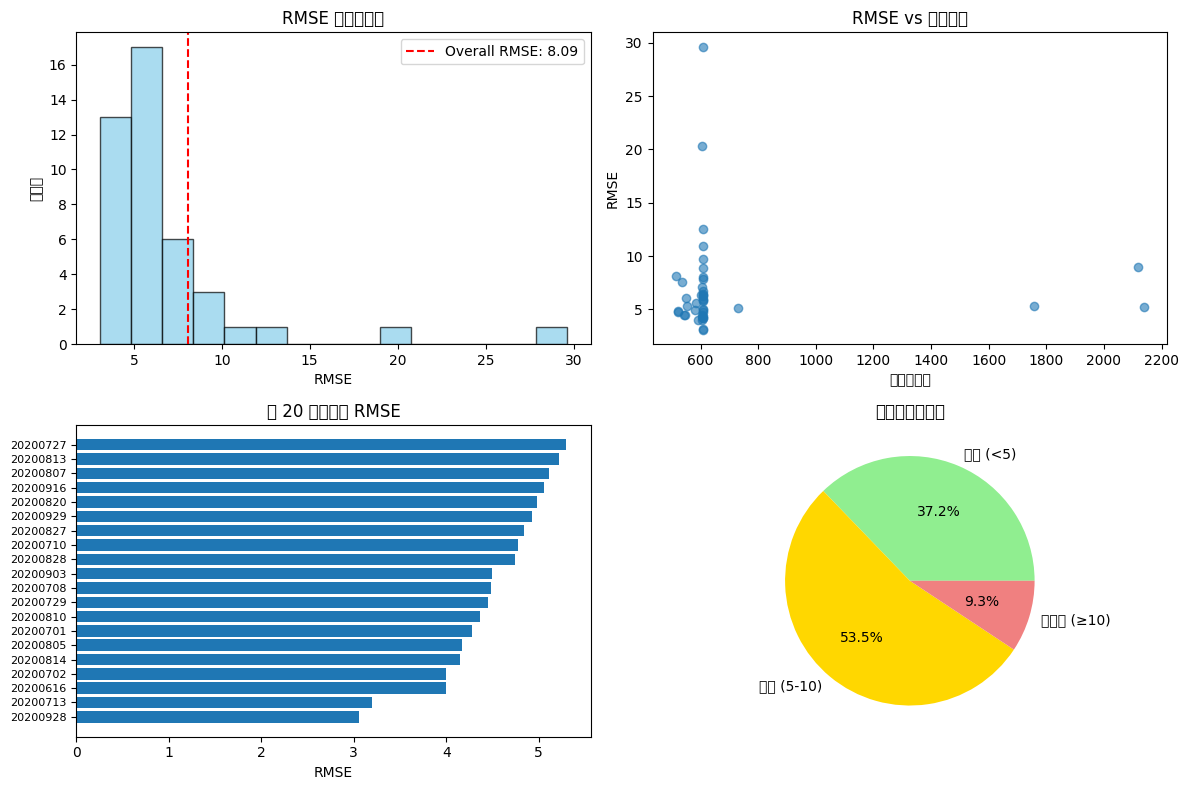


=== üí° ÊîπÈÄ≤Âª∫Ë≠∞ ===
üîß ÂèØÂòóË©¶ÊîπÈÄ≤Ôºö
   ‚Ä¢ Ë™øÊï¥Ë∂ÖÂèÉÊï∏
   ‚Ä¢ Ê∑ªÂä†ÊôÇÈñìÂ∫èÂàóÁâπÂæµ
   ‚Ä¢ ÈáùÂ∞çË°®ÁèæÂ∑ÆÁöÑÊ™îÊ°àÂñÆÁç®Âª∫Ê®°

=== üìà Âü∫Ê∫ñÊØîËºÉ ===
ÁõÆÂâç RMSE: 8.089
Á∞°ÂñÆÂü∫Ê∫ñ (ÂùáÂÄºÈ†êÊ∏¨): 16.255
ÊîπÈÄ≤ÂπÖÂ∫¶: 50.2%


In [16]:
# === üìä Ê®°ÂûãÊ∫ñÁ¢∫Â∫¶Á∂úÂêàË©ï‰º∞ ===
import matplotlib.pyplot as plt
import seaborn as sns

print("=== üìä ElasticNet Ê®°ÂûãÊ∫ñÁ¢∫Â∫¶Ë©ï‰º∞ ===")
print(f"Êï¥È´î RMSE: {elastic_overall_rmse:.3f}")
print(f"Êï¥È´î MAE:  {elastic_overall_mae:.3f}")

# 1. ÁõÆÊ®ôËÆäÊï∏Â∞∫Â∫¶ÂàÜÊûê
print("\n=== üéØ ÁõÆÊ®ôËÆäÊï∏Áµ±Ë®à ===")
target_stats = train_df[TARGETS].describe()
print(target_stats)

# 2. Áõ∏Â∞çË™§Â∑ÆÂàÜÊûê (RMSE / ÁõÆÊ®ôËÆäÊï∏Ê®ôÊ∫ñÂ∑Æ)
disp_x_std = train_df["Disp. X"].std()
disp_z_std = train_df["Disp. Z"].std()
relative_rmse_x = elastic_overall_rmse / disp_x_std
relative_rmse_z = elastic_overall_rmse / disp_z_std

print(f"\n=== üìè Áõ∏Â∞çË™§Â∑ÆË©ï‰º∞ ===")
print(f"Disp. X Ê®ôÊ∫ñÂ∑Æ: {disp_x_std:.3f}")
print(f"Disp. Z Ê®ôÊ∫ñÂ∑Æ: {disp_z_std:.3f}")
print(f"Áõ∏Â∞ç RMSE (X): {relative_rmse_x:.1%}")
print(f"Áõ∏Â∞ç RMSE (Z): {relative_rmse_z:.1%}")

# 3. Ê∫ñÁ¢∫Â∫¶ÂàÜÁ¥ö
def accuracy_grade(rmse_val):
    if rmse_val < 5:
        return "üü¢ ÂÑ™ÁßÄ (< 5)"
    elif rmse_val < 10:
        return "üü° ËâØÂ•Ω (5-10)"
    elif rmse_val < 15:
        return "üü† ‰∏ÄËà¨ (10-15)"
    else:
        return "üî¥ ÈúÄÊîπÈÄ≤ (> 15)"

print(f"\n=== üèÜ Ê∫ñÁ¢∫Â∫¶Ë©ïÁ¥ö ===")
print(f"Êï¥È´îË©ïÁ¥ö: {accuracy_grade(elastic_overall_rmse)}")

# 4. Ê™îÊ°àÁ¥öÂà•Ê∫ñÁ¢∫Â∫¶ÂàÜÊûê
good_files = elastic_detail[elastic_detail['rmse_101p'] < 5]
medium_files = elastic_detail[(elastic_detail['rmse_101p'] >= 5) & (elastic_detail['rmse_101p'] < 10)]
poor_files = elastic_detail[elastic_detail['rmse_101p'] >= 10]

print(f"\n=== üìÅ Ê™îÊ°àÊ∫ñÁ¢∫Â∫¶ÂàÜÂ∏É ===")
print(f"üü¢ ÂÑ™ÁßÄÊ™îÊ°à (RMSE < 5):  {len(good_files)}/{len(elastic_detail)} ({len(good_files)/len(elastic_detail)*100:.1f}%)")
print(f"üü° ËâØÂ•ΩÊ™îÊ°à (RMSE 5-10): {len(medium_files)}/{len(elastic_detail)} ({len(medium_files)/len(elastic_detail)*100:.1f}%)")
print(f"üî¥ ÂæÖÊîπÈÄ≤Ê™îÊ°à (RMSE ‚â• 10): {len(poor_files)}/{len(elastic_detail)} ({len(poor_files)/len(elastic_detail)*100:.1f}%)")

# 5. ÊúÄÈúÄË¶ÅÊîπÈÄ≤ÁöÑÊ™îÊ°à
print(f"\n=== ‚ö†Ô∏è  ÊúÄÈúÄË¶ÅÊîπÈÄ≤ÁöÑ 5 ÂÄãÊ™îÊ°à ===")
worst_files = elastic_detail.tail(5)[['file', 'rmse_101p', 'rows_total']]
display(worst_files)

# 6. Ë¶ñË¶∫Âåñ RMSE ÂàÜÂ∏É
plt.figure(figsize=(12, 8))

# Â≠êÂúñ 1: RMSE ÂàÜÂ∏ÉÁõ¥ÊñπÂúñ
plt.subplot(2, 2, 1)
plt.hist(elastic_detail['rmse_101p'], bins=15, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(elastic_overall_rmse, color='red', linestyle='--', label=f'Overall RMSE: {elastic_overall_rmse:.2f}')
plt.xlabel('RMSE')
plt.ylabel('Ê™îÊ°àÊï∏')
plt.title('RMSE ÂàÜÂ∏ÉÁõ¥ÊñπÂúñ')
plt.legend()

# Â≠êÂúñ 2: RMSE vs Ê™îÊ°àÂ§ßÂ∞è
plt.subplot(2, 2, 2)
plt.scatter(elastic_detail['rows_total'], elastic_detail['rmse_101p'], alpha=0.6)
plt.xlabel('Ê™îÊ°àÁ∏ΩË°åÊï∏')
plt.ylabel('RMSE')
plt.title('RMSE vs Ê™îÊ°àÂ§ßÂ∞è')

# Â≠êÂúñ 3: Ââç 20 Ê™îÊ°à RMSE
plt.subplot(2, 2, 3)
top20 = elastic_detail.head(20)
plt.barh(range(len(top20)), top20['rmse_101p'])
plt.yticks(range(len(top20)), [f.split('_')[1][:8] for f in top20['file']], fontsize=8)
plt.xlabel('RMSE')
plt.title('Ââç 20 ÊúÄ‰Ω≥Ê™îÊ°à RMSE')

# Â≠êÂúñ 4: Ê∫ñÁ¢∫Â∫¶ÂàÜÁ¥öÂúìÈ§ÖÂúñ
plt.subplot(2, 2, 4)
accuracy_counts = [len(good_files), len(medium_files), len(poor_files)]
labels = ['ÂÑ™ÁßÄ (<5)', 'ËâØÂ•Ω (5-10)', 'ÂæÖÊîπÈÄ≤ (‚â•10)']
colors = ['lightgreen', 'gold', 'lightcoral']
plt.pie(accuracy_counts, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Ê™îÊ°àÊ∫ñÁ¢∫Â∫¶ÂàÜÂ∏É')

plt.tight_layout()
plt.show()

# 7. ÊîπÈÄ≤Âª∫Ë≠∞
print(f"\n=== üí° ÊîπÈÄ≤Âª∫Ë≠∞ ===")
if elastic_overall_rmse > 10:
    print("üîß Âª∫Ë≠∞ÂÑ™ÂÖàÊîπÈÄ≤Ôºö")
    print("   ‚Ä¢ Â¢ûÂä†ÁâπÂæµÂ∑•Á®ã (ÁßªÂãïÂπ≥Âùá„ÄÅÂ∑ÆÂàÜ)")
    print("   ‚Ä¢ ÂòóË©¶ÈùûÁ∑öÊÄßÊ®°Âûã (XGBoost, Random Forest)")
    print("   ‚Ä¢ Ê™¢Êü•Áï∞Â∏∏ÂÄºÂíåÁº∫Â§±ÂÄºËôïÁêÜ")
elif elastic_overall_rmse > 5:
    print("üîß ÂèØÂòóË©¶ÊîπÈÄ≤Ôºö")
    print("   ‚Ä¢ Ë™øÊï¥Ë∂ÖÂèÉÊï∏")
    print("   ‚Ä¢ Ê∑ªÂä†ÊôÇÈñìÂ∫èÂàóÁâπÂæµ")
    print("   ‚Ä¢ ÈáùÂ∞çË°®ÁèæÂ∑ÆÁöÑÊ™îÊ°àÂñÆÁç®Âª∫Ê®°")
else:
    print("‚úÖ Ê®°ÂûãË°®ÁèæËâØÂ•ΩÔºÅÂèØËÄÉÊÖÆÔºö")
    print("   ‚Ä¢ Ê®°ÂûãËûçÂêà (Ensemble)")
    print("   ‚Ä¢ ÂæÆË™øË∂ÖÂèÉÊï∏‰ª•ÈÄ≤‰∏ÄÊ≠•ÊèêÂçá")

print(f"\n=== üìà Âü∫Ê∫ñÊØîËºÉ ===")
print(f"ÁõÆÂâç RMSE: {elastic_overall_rmse:.3f}")
print(f"Á∞°ÂñÆÂü∫Ê∫ñ (ÂùáÂÄºÈ†êÊ∏¨): {train_df[TARGETS].std().mean():.3f}")
print(f"ÊîπÈÄ≤ÂπÖÂ∫¶: {(train_df[TARGETS].std().mean() - elastic_overall_rmse) / train_df[TARGETS].std().mean() * 100:.1f}%")

In [15]:
# === üìÇ Ê™¢Êü•ÂÖ©ÂÄãÊºîÁÆóÊ≥ïÁöÑÈ†êÊ∏¨Ëº∏Âá∫ÂìÅË≥™ ===
print("=== üìÇ È†êÊ∏¨Ëº∏Âá∫Ê™¢Êü• ===")

# 1. Á¢∫Ë™çË∑ØÂæëË®≠ÂÆö
print(f"Ë®ìÁ∑¥Ë≥áÊñôË∑ØÂæë (TRAIN_DIR): {TRAIN_DIR}")
print(f"üîµ ElasticNet Ëº∏Âá∫Ë∑ØÂæë: {OUT_DIR_ELASTIC}")
try:
    print(f"üü£ BayesianRidge Ëº∏Âá∫Ë∑ØÂæë: {OUT_DIR_BAYES}")
    has_bayes = True
except NameError:
    print("üü£ BayesianRidge Ëº∏Âá∫Ë∑ØÂæë: Êú™ÂÆöÁæ© (ÈúÄÂÖàÂü∑Ë°å BayesianRidge Ë®ìÁ∑¥)")
    has_bayes = False

# 2. Ê™¢Êü•È†êÊ∏¨Ê™îÊ°à
elastic_files = sorted(Path(OUT_DIR_ELASTIC).glob('*.csv'))
print(f"\nüìÑ ElasticNet È†êÊ∏¨Ê™îÊ°àÊï∏: {len(elastic_files)}")

if has_bayes:
    bayes_files = sorted(Path(OUT_DIR_BAYES).glob('*.csv'))
    print(f"üìÑ BayesianRidge È†êÊ∏¨Ê™îÊ°àÊï∏: {len(bayes_files)}")

def check_prediction_quality(pred_files, algorithm_name, color_emoji):
    if len(pred_files) > 0:
        # 3. Èö®Ê©üÊ™¢Êü•‰∏ÄÂÄãÈ†êÊ∏¨Ê™îÊ°à
        sample_pred_file = pred_files[0]
        print(f"\n{color_emoji} === {algorithm_name} È†êÊ∏¨ÂìÅË≥™Ê™¢Êü• ===")
        print(f"üìã Ê™¢Êü•Ê™îÊ°à: {sample_pred_file.name}")
        
        pred_df = pd.read_csv(sample_pred_file)
        print(f"Ê™îÊ°àÂ§ßÂ∞è: {pred_df.shape}")
        
        # Ê™¢Êü•Ââç 100 Ë°åËàáÂæåÈù¢ÁöÑÂ∑ÆÁï∞
        if len(pred_df) > 100:
            print(f"\nüîç ÂâçÂæåË≥áÊñôÊØîËºÉ:")
            print(f"Ââç 5 Ë°å Disp.X ÁØÑÂúç: {pred_df['Disp. X'].iloc[:5].min():.3f} ~ {pred_df['Disp. X'].iloc[:5].max():.3f}")
            print(f"101+ Ë°å Disp.X ÁØÑÂúç: {pred_df['Disp. X'].iloc[100:].min():.3f} ~ {pred_df['Disp. X'].iloc[100:].max():.3f}")
            print(f"Ââç 5 Ë°å Disp.Z ÁØÑÂúç: {pred_df['Disp. Z'].iloc[:5].min():.3f} ~ {pred_df['Disp. Z'].iloc[:5].max():.3f}")
            print(f"101+ Ë°å Disp.Z ÁØÑÂúç: {pred_df['Disp. Z'].iloc[100:].min():.3f} ~ {pred_df['Disp. Z'].iloc[100:].max():.3f}")
            
            # Ê™¢Êü•È†êÊ∏¨ÂÄºÊòØÂê¶ÂêàÁêÜ
            pred_x_std = pred_df['Disp. X'].iloc[100:].std()
            pred_z_std = pred_df['Disp. Z'].iloc[100:].std()
            
            print(f"\nüìä È†êÊ∏¨ÂÄºÁµ±Ë®à:")
            print(f"È†êÊ∏¨ Disp.X Ê®ôÊ∫ñÂ∑Æ: {pred_x_std:.3f}")
            print(f"È†êÊ∏¨ Disp.Z Ê®ôÊ∫ñÂ∑Æ: {pred_z_std:.3f}")
            
            # Ê™¢Êü•ÊòØÂê¶ÊúâÁï∞Â∏∏ÂÄº
            x_outliers = ((pred_df['Disp. X'].iloc[100:].abs() > 100).sum())
            z_outliers = ((pred_df['Disp. Z'].iloc[100:].abs() > 100).sum())
            
            print(f"\n‚ö†Ô∏è  Áï∞Â∏∏ÂÄºÊ™¢Êü• (ÁµïÂ∞çÂÄº > 100):")
            print(f"Disp.X Áï∞Â∏∏ÂÄº: {x_outliers} ÂÄã")
            print(f"Disp.Z Áï∞Â∏∏ÂÄº: {z_outliers} ÂÄã")
            
            if x_outliers == 0 and z_outliers == 0:
                print("‚úÖ È†êÊ∏¨ÂÄºÁúãËµ∑‰æÜÊ≠£Â∏∏ÔºÅ")
            else:
                print("üî¥ ÁôºÁèæÁï∞Â∏∏È†êÊ∏¨ÂÄºÔºåÂèØËÉΩÈúÄË¶ÅÊ™¢Êü•Ê®°Âûã")
                
        # 4. È°ØÁ§∫È†êÊ∏¨Ê™îÊ°àÊ®£Êú¨
        print(f"\nüìù È†êÊ∏¨Ê™îÊ°àÂÖßÂÆπ (Ââç 3 Ë°å + 101-103 Ë°å):")
        display(pd.concat([pred_df.head(3), pred_df.iloc[100:103]]))
        
    else:
        print(f"\n{color_emoji} ‚ùå Êâæ‰∏çÂà∞ {algorithm_name} È†êÊ∏¨Ê™îÊ°à")

# Ê™¢Êü• ElasticNet È†êÊ∏¨ÂìÅË≥™
check_prediction_quality(elastic_files, "ElasticNet", "üîµ")

# Ê™¢Êü• BayesianRidge È†êÊ∏¨ÂìÅË≥™ (Â¶ÇÊûúÂ≠òÂú®)
if has_bayes:
    check_prediction_quality(bayes_files, "BayesianRidge", "üü£")

# 5. Ë∑ØÂæëÊæÑÊ∏ÖË™™Êòé  
print(f"\nüìç Ë∑ØÂæëË™™Êòé:")
print(f"üîµ TRAIN_DIR: ÂéüÂßãË®ìÁ∑¥Ë≥áÊñô (Áî®ÊñºË®ìÁ∑¥Ê®°Âûã)")
print(f"üü¢ OUT_DIR_ELASTIC: ElasticNet È†êÊ∏¨ÁµêÊûúËº∏Âá∫")
if has_bayes:
    print(f"üü£ OUT_DIR_BAYES: BayesianRidge È†êÊ∏¨ÁµêÊûúËº∏Âá∫")
print(f"üü° RMSE Ë©ï‰º∞: ‰ΩøÁî® TRAIN_DIR Ë≥áÊñôÁöÑ 101+ Ë°å")
print(f"üü† È†êÊ∏¨ÂìÅË≥™: Ê™¢Êü•ÂêÑÊºîÁÆóÊ≥ïËº∏Âá∫ÁõÆÈåÑÂÖßÁöÑÈ†êÊ∏¨ÁµêÊûúÂêàÁêÜÊÄß")

# 6. ÊØîËºÉÂÖ©ÂÄãÊºîÁÆóÊ≥ïÁöÑÈ†êÊ∏¨Â∑ÆÁï∞ (Â¶ÇÊûúÈÉΩÂ≠òÂú®)
if has_bayes and len(elastic_files) > 0 and len(bayes_files) > 0:
    print(f"\nüîÑ === È†êÊ∏¨ÁµêÊûúÂ∑ÆÁï∞ÊØîËºÉ ===")
    
    # ÈÅ∏ÊìáÂêå‰∏ÄÂÄãÊ™îÊ°àÊØîËºÉ
    common_files = set([f.name for f in elastic_files]) & set([f.name for f in bayes_files])
    if common_files:
        sample_file = list(common_files)[0]
        elastic_pred = pd.read_csv(OUT_DIR_ELASTIC + "/" + sample_file)
        bayes_pred = pd.read_csv(OUT_DIR_BAYES + "/" + sample_file)
        
        if len(elastic_pred) > 100 and len(bayes_pred) > 100:
            # Ë®àÁÆó 101+ Ë°åÁöÑÈ†êÊ∏¨Â∑ÆÁï∞
            elastic_x = elastic_pred['Disp. X'].iloc[100:].values
            elastic_z = elastic_pred['Disp. Z'].iloc[100:].values
            bayes_x = bayes_pred['Disp. X'].iloc[100:].values
            bayes_z = bayes_pred['Disp. Z'].iloc[100:].values
            
            diff_x = np.abs(elastic_x - bayes_x)
            diff_z = np.abs(elastic_z - bayes_z)
            
            print(f"üìä Ê™îÊ°à {sample_file} È†êÊ∏¨Â∑ÆÁï∞:")
            print(f"Disp.X Âπ≥ÂùáÁµïÂ∞çÂ∑ÆÁï∞: {diff_x.mean():.4f}")
            print(f"Disp.Z Âπ≥ÂùáÁµïÂ∞çÂ∑ÆÁï∞: {diff_z.mean():.4f}")
            print(f"Disp.X ÊúÄÂ§ßÁµïÂ∞çÂ∑ÆÁï∞: {diff_x.max():.4f}")
            print(f"Disp.Z ÊúÄÂ§ßÁµïÂ∞çÂ∑ÆÁï∞: {diff_z.max():.4f}")
            
            if diff_x.mean() < 1.0 and diff_z.mean() < 1.0:
                print("‚úÖ ÂÖ©ÂÄãÊºîÁÆóÊ≥ïÈ†êÊ∏¨ÁµêÊûúÁõ∏Ëøë")
            else:
                print("üîç ÂÖ©ÂÄãÊºîÁÆóÊ≥ïÈ†êÊ∏¨ÁµêÊûúÂ∑ÆÁï∞ËºÉÂ§ßÔºåÂèØÈÄ≤‰∏ÄÊ≠•ÂàÜÊûê")

=== üìÇ È†êÊ∏¨Ëº∏Âá∫Ê™¢Êü• ===
Ë®ìÁ∑¥Ë≥áÊñôË∑ØÂæë (TRAIN_DIR): /Users/benjamin/1132/11325/AI_Race/2025_dataset_0806 3/train
üîµ ElasticNet Ëº∏Âá∫Ë∑ØÂæë: /Users/benjamin/1132/11325/AI_Race/preds_out_elasticnet
üü£ BayesianRidge Ëº∏Âá∫Ë∑ØÂæë: /Users/benjamin/1132/11325/AI_Race/preds_out_bayesian

üìÑ ElasticNet È†êÊ∏¨Ê™îÊ°àÊï∏: 43
üìÑ BayesianRidge È†êÊ∏¨Ê™îÊ°àÊï∏: 43

üîµ === ElasticNet È†êÊ∏¨ÂìÅË≥™Ê™¢Êü• ===
üìã Ê™¢Êü•Ê™îÊ°à: _20200615_GV1-1203_2000rpm_XZ-5m-min_5H(wAC-from0-25C).csv
Ê™îÊ°àÂ§ßÂ∞è: (515, 27)

üîç ÂâçÂæåË≥áÊñôÊØîËºÉ:
Ââç 5 Ë°å Disp.X ÁØÑÂúç: -2.178 ~ 0.000
101+ Ë°å Disp.X ÁØÑÂúç: -25.978 ~ 31.212
Ââç 5 Ë°å Disp.Z ÁØÑÂúç: 0.000 ~ 0.172
101+ Ë°å Disp.Z ÁØÑÂúç: -39.963 ~ -15.712

üìä È†êÊ∏¨ÂÄºÁµ±Ë®à:
È†êÊ∏¨ Disp.X Ê®ôÊ∫ñÂ∑Æ: 17.050
È†êÊ∏¨ Disp.Z Ê®ôÊ∫ñÂ∑Æ: 5.297

‚ö†Ô∏è  Áï∞Â∏∏ÂÄºÊ™¢Êü• (ÁµïÂ∞çÂÄº > 100):
Disp.X Áï∞Â∏∏ÂÄº: 0 ÂÄã
Disp.Z Áï∞Â∏∏ÂÄº: 0 ÂÄã
‚úÖ È†êÊ∏¨ÂÄºÁúãËµ∑‰æÜÊ≠£Â∏∏ÔºÅ

üìù È†êÊ∏¨Ê™îÊ°àÂÖßÂÆπ (Ââç 3 Ë°å + 101-103 Ë°å):


Time  PT01  PT02  PT03  PT04  PT05  PT06  PT07  PT08  PT09  ...  TC04  \
0     1.017  21.5  21.7  21.8  21.1  21.2  20.9  20.9  21.6  21.1  ...  19.1   
1     1.185  21.5  21.8  21.8  21.1  21.2  20.9  20.9  21.6  21.2  ...  19.4   
2     1.354  21.5  21.8  21.8  21.1  21.2  20.9  20.9  21.6  21.2  ...  19.2   
100  20.418  22.2  23.3  23.3  21.4  22.4  24.1  21.5  24.6  25.1  ...  20.2   
101  21.093  22.3  23.4  23.3  21.5  22.5  24.2  21.5  24.7  25.1  ...  20.2   
102  21.766  22.3  23.4  23.4  21.5  22.5  24.2  21.5  24.8  25.2  ...  20.3   

     TC05  TC06  TC07  TC08  Spindle Motor  X Motor  Z Motor    Disp. X  \
0    19.4  19.6  21.6  22.3           19.0     19.0     20.0   0.000000   
1    19.5  19.7  21.7  22.4           19.0     19.0     20.0   0.000000   
2    19.5  19.8  21.7  22.4           19.0     20.0     20.0  -1.188165   
100  21.0  20.7  23.6  22.9           23.0     21.0     21.0 -16.043263   
101  21.0  20.6  23.7  23.0           23.0     21.0     21.0 -13.709698   
102  21.0  20.7  23.9  23.1           23.0     21.0     21.0 -13.056274   

       Disp. Z  
0     0.000000  
1     0.086104  
2     0.086104  
100 -16.470672  
101 -15.711761  
102 -15.918874  

[6 rows x 27 columns]


üü£ === BayesianRidge È†êÊ∏¨ÂìÅË≥™Ê™¢Êü• ===
üìã Ê™¢Êü•Ê™îÊ°à: _20200615_GV1-1203_2000rpm_XZ-5m-min_5H(wAC-from0-25C).csv
Ê™îÊ°àÂ§ßÂ∞è: (515, 27)

üîç ÂâçÂæåË≥áÊñôÊØîËºÉ:
Ââç 5 Ë°å Disp.X ÁØÑÂúç: -2.178 ~ 0.000
101+ Ë°å Disp.X ÁØÑÂúç: -26.004 ~ 31.506
Ââç 5 Ë°å Disp.Z ÁØÑÂúç: 0.000 ~ 0.172
101+ Ë°å Disp.Z ÁØÑÂúç: -41.344 ~ -16.672

üìä È†êÊ∏¨ÂÄºÁµ±Ë®à:
È†êÊ∏¨ Disp.X Ê®ôÊ∫ñÂ∑Æ: 16.853
È†êÊ∏¨ Disp.Z Ê®ôÊ∫ñÂ∑Æ: 5.448

‚ö†Ô∏è  Áï∞Â∏∏ÂÄºÊ™¢Êü• (ÁµïÂ∞çÂÄº > 100):
Disp.X Áï∞Â∏∏ÂÄº: 0 ÂÄã
Disp.Z Áï∞Â∏∏ÂÄº: 0 ÂÄã
‚úÖ È†êÊ∏¨ÂÄºÁúãËµ∑‰æÜÊ≠£Â∏∏ÔºÅ

üìù È†êÊ∏¨Ê™îÊ°àÂÖßÂÆπ (Ââç 3 Ë°å + 101-103 Ë°å):


Time  PT01  PT02  PT03  PT04  PT05  PT06  PT07  PT08  PT09  ...  TC04  \
0     1.017  21.5  21.7  21.8  21.1  21.2  20.9  20.9  21.6  21.1  ...  19.1   
1     1.185  21.5  21.8  21.8  21.1  21.2  20.9  20.9  21.6  21.2  ...  19.4   
2     1.354  21.5  21.8  21.8  21.1  21.2  20.9  20.9  21.6  21.2  ...  19.2   
100  20.418  22.2  23.3  23.3  21.4  22.4  24.1  21.5  24.6  25.1  ...  20.2   
101  21.093  22.3  23.4  23.3  21.5  22.5  24.2  21.5  24.7  25.1  ...  20.2   
102  21.766  22.3  23.4  23.4  21.5  22.5  24.2  21.5  24.8  25.2  ...  20.3   

     TC05  TC06  TC07  TC08  Spindle Motor  X Motor  Z Motor    Disp. X  \
0    19.4  19.6  21.6  22.3           19.0     19.0     20.0   0.000000   
1    19.5  19.7  21.7  22.4           19.0     19.0     20.0   0.000000   
2    19.5  19.8  21.7  22.4           19.0     20.0     20.0  -1.188165   
100  21.0  20.7  23.6  22.9           23.0     21.0     21.0 -16.217832   
101  21.0  20.6  23.7  23.0           23.0     21.0     21.0 -14.738924   
102  21.0  20.7  23.9  23.1           23.0     21.0     21.0 -13.808962   

       Disp. Z  
0     0.000000  
1     0.086104  
2     0.086104  
100 -17.250831  
101 -17.040140  
102 -16.671998  

[6 rows x 27 columns]


üìç Ë∑ØÂæëË™™Êòé:
üîµ TRAIN_DIR: ÂéüÂßãË®ìÁ∑¥Ë≥áÊñô (Áî®ÊñºË®ìÁ∑¥Ê®°Âûã)
üü¢ OUT_DIR_ELASTIC: ElasticNet È†êÊ∏¨ÁµêÊûúËº∏Âá∫
üü£ OUT_DIR_BAYES: BayesianRidge È†êÊ∏¨ÁµêÊûúËº∏Âá∫
üü° RMSE Ë©ï‰º∞: ‰ΩøÁî® TRAIN_DIR Ë≥áÊñôÁöÑ 101+ Ë°å
üü† È†êÊ∏¨ÂìÅË≥™: Ê™¢Êü•ÂêÑÊºîÁÆóÊ≥ïËº∏Âá∫ÁõÆÈåÑÂÖßÁöÑÈ†êÊ∏¨ÁµêÊûúÂêàÁêÜÊÄß

üîÑ === È†êÊ∏¨ÁµêÊûúÂ∑ÆÁï∞ÊØîËºÉ ===
üìä Ê™îÊ°à _20200709_GV1-1203_1000rpm_XZ-5m-min_6H(wAC-from0-20Cto25C).csv È†êÊ∏¨Â∑ÆÁï∞:
Disp.X Âπ≥ÂùáÁµïÂ∞çÂ∑ÆÁï∞: 0.4811
Disp.Z Âπ≥ÂùáÁµïÂ∞çÂ∑ÆÁï∞: 0.4775
Disp.X ÊúÄÂ§ßÁµïÂ∞çÂ∑ÆÁï∞: 1.6193
Disp.Z ÊúÄÂ§ßÁµïÂ∞çÂ∑ÆÁï∞: 1.7465
‚úÖ ÂÖ©ÂÄãÊºîÁÆóÊ≥ïÈ†êÊ∏¨ÁµêÊûúÁõ∏Ëøë
